<a href="https://colab.research.google.com/github/eminshall/Predictive-Analytics/blob/main/Basket_Ball_Data_Science_for_Regression_1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Data Wrangling

## 1.1 Objectives

Boise State University Atheletic Department wants to know how to win more games.

Their primary question is which drills or performance related skills will lead to winning more games in the season.

Should they focus on Defense or Offense drills?

### 1.1.1 Imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import datetime
import pickle
from sklearn import __version__ as sklearn_version

import os

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2 Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/cbb.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885 entries, 0 to 3884
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        3885 non-null   object 
 1   CONF        3885 non-null   object 
 2   G           3885 non-null   int64  
 3   W           3885 non-null   int64  
 4   ADJOE       3885 non-null   float64
 5   ADJDE       3885 non-null   float64
 6   BARTHAG     3885 non-null   float64
 7   EFG_O       3885 non-null   float64
 8   EFG_D       3885 non-null   float64
 9   TOR         3885 non-null   float64
 10  TORD        3885 non-null   float64
 11  ORB         3885 non-null   float64
 12  DRB         3885 non-null   float64
 13  FTR         3885 non-null   float64
 14  FTRD        3885 non-null   float64
 15  2P_O        3885 non-null   float64
 16  2P_D        3885 non-null   float64
 17  3P_O        3885 non-null   float64
 18  3P_D        3885 non-null   float64
 19  ADJ_T       3885 non-null  

In [ ]:
df.head()

TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1       Wisconsin  B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
2        Michigan  B10  40  33  114.4   90.4   0.9375   53.9   47.7  14.0   
3      Texas Tech  B12  38  31  115.2   85.2   0.9696   53.5   43.0  17.7   
4         Gonzaga  WCC  39  37  117.8   86.3   0.9728   56.6   41.1  16.2   

   ...  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  YEAR  
0  ...  30.4  53.9  44.6  32.7  36.2   71.7   8.6         2ND   1.0  2016  
1  ...  22.4  54.8  44.7  36.5  37.5   59.3  11.3         2ND   1.0  2015  
2  ...  30.0  54.7  46.8  35.2  33.2   65.9   6.9         2ND   3.0  2018  
3  ...  36.6  52.8  41.9  36.5  29.7   67.5   7.0         2ND   3.0  2019  
4  ...  26.9  56.3  40.0  38.2  29.0   71.5   7.7         2ND   1.0  2017  

[5 rows x 24 columns]

## 1.3 Explore Data

### 1.3.1 Feature of Interest

In [ ]:
df = df.sort_values(by='YEAR').reset_index(drop=True)
df.head()

TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  ...  \
0   Princeton   Ivy  26  16  107.9  100.1   0.7046   53.9   48.2  20.3  ...   
1    Nebraska   B10  33  15  101.4   96.1   0.6476   45.4   48.6  17.3  ...   
2  Seton Hall    BE  33  15  103.5   96.7   0.6845   51.3   46.7  23.8  ...   
3         UAB  CUSA  32  15  100.0   98.0   0.5580   48.4   50.7  21.8  ...   
4     Georgia   SEC  32  15  100.9   94.4   0.6817   46.9   45.0  23.0  ...   

   FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T  WAB  POSTSEASON  SEED  YEAR  
0  37.6  49.9  47.0  41.0  34.2   60.6 -5.0         NaN   NaN  2013  
1  38.9  45.1  48.0  30.7  33.4   62.2 -3.4         NaN   NaN  2013  
2  39.1  48.6  44.6  36.7  34.0   65.1 -5.6         NaN   NaN  2013  
3  38.6  47.9  49.0  32.8  36.1   71.2 -8.2         NaN   NaN  2013  
4  37.9  43.5  42.3  35.7  32.9   62.3 -6.3         NaN   NaN  2013  

[5 rows x 24 columns]

In [ ]:
df[df['TEAM'] == 'Boise St.'].T

94         381        834        1236       1525       1976  \
TEAM        Boise St.  Boise St.  Boise St.  Boise St.  Boise St.  Boise St.   
CONF              MWC        MWC        MWC        MWC        MWC        MWC   
G                  30         31         32         30         31         31   
W                  19         18         23         18         20         23   
ADJOE           112.0      114.3      109.5      108.2      109.1      109.2   
ADJDE            97.4      103.7       96.0       99.7      101.4       96.3   
BARTHAG        0.8332     0.7546      0.821      0.719     0.6986     0.8087   
EFG_O            51.8       51.2       53.2       51.7       51.8       53.8   
EFG_D            51.4       51.3       47.6       52.0       48.3       48.8   
TOR              18.4       15.0       16.1       16.4       17.9       18.9   
TORD             20.0       17.0       19.4       20.2       16.6       16.4   
ORB              30.3       32.1       27.8       27.2       27.7       29.3   
DRB              24.4       26.4       25.6       25.5       26.5       18.4   
FTR              33.7       36.6       32.4       40.9       40.5       31.0   
FTRD             42.2       42.3       31.6       36.8       41.9       29.5   
2P_O             48.4       49.8       49.6       53.7       51.5       52.0   
2P_D             51.0       50.4       48.1       50.9       47.1       48.4   
3P_O             38.7       35.9       38.9       32.6       34.8       37.5   
3P_D             34.8       35.3       31.3       36.0       34.2       33.0   
ADJ_T            66.2       65.5       63.4       70.3       70.5       70.1   
WAB              -0.2       -3.3        0.2       -3.6       -3.2       -0.4   
POSTSEASON        R68        NaN        R68        NaN        NaN        NaN   
SEED             13.0        NaN       11.0        NaN        NaN        NaN   
YEAR             2013       2014       2015       2016       2017       2018   

                 2239       2801       3141       3223       3564  
TEAM        Boise St.  Boise St.  Boise St.  Boise St.  Boise St.  
CONF              MWC        MWC        MWC        MWC        MWC  
G                  32         25         34         33         30  
W                  13         18         27         24         22  
ADJOE           107.6      107.7      107.6      110.1      114.0  
ADJDE           102.4       96.7       92.9       95.6       97.8  
BARTHAG        0.6404     0.7753     0.8434     0.8361     0.8538  
EFG_O            53.9       52.1       50.7       51.6       51.6  
EFG_D            51.8       48.7       48.3       47.5       49.8  
TOR              17.3       16.5       18.4       16.6       16.5  
TORD             18.5       20.2       20.2       17.5       16.8  
ORB              23.5       27.3       30.6       27.2       32.5  
DRB              24.4       23.8       22.4       24.0       23.1  
FTR              31.8       34.4       35.2       30.3       36.1  
FTRD             33.6       28.0       25.9       27.6       33.1  
2P_O             54.7       52.4       50.6       50.6       51.2  
2P_D             52.0       48.5       48.0       48.0       52.1  
3P_O             35.2       34.4       34.0       35.6       34.8  
3P_D             34.3       32.6       32.6       31.2       30.6  
ADJ_T            66.9       69.3       64.5       66.3       66.6  
WAB             -11.9       -0.7        3.5        2.1        0.9  
POSTSEASON        NaN        NaN        R64        R64        R68  
SEED              NaN        NaN        8.0       10.0       10.0  
YEAR             2019       2021       2022       2023       2024

### 1.3.2 Missing Values by Column

In [ ]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

count          %
TEAM            0   0.000000
CONF            0   0.000000
G               0   0.000000
W               0   0.000000
ADJOE           0   0.000000
ADJDE           0   0.000000
BARTHAG         0   0.000000
EFG_O           0   0.000000
EFG_D           0   0.000000
TOR             0   0.000000
TORD            0   0.000000
ORB             0   0.000000
DRB             0   0.000000
FTR             0   0.000000
FTRD            0   0.000000
2P_O            0   0.000000
2P_D            0   0.000000
3P_O            0   0.000000
3P_D            0   0.000000
ADJ_T           0   0.000000
WAB             0   0.000000
YEAR            0   0.000000
POSTSEASON   3137  80.746461
SEED         3137  80.746461

### 1.3.3 Categorical Features

In [ ]:
df.select_dtypes('object')

TEAM  CONF POSTSEASON
0                  Princeton   Ivy        NaN
1                   Nebraska   B10        NaN
2                 Seton Hall    BE        NaN
3                        UAB  CUSA        NaN
4                    Georgia   SEC        NaN
...                      ...   ...        ...
3880          St. Francis PA   NEC        NaN
3881                   IUPUI  Horz        NaN
3882              Coppin St.  MEAC        NaN
3883  Mississippi Valley St.  SWAC        NaN
3884     Arkansas Pine Bluff  SWAC        NaN

[3885 rows x 3 columns]

#### 1.3.3.1 Unique Values

In [ ]:
df['TEAM'].value_counts()

TEAM
Florida Gulf Coast    11
La Salle              11
Oregon                11
Arizona               11
Michigan St.          11
                      ..
Lindenwood             2
Queens                 2
Texas A&M Commerce     2
Dixie St.              1
Le Moyne               1
Name: count, Length: 369, dtype: int64

#### 1.3.3.2 Distinct Values

In [ ]:
df[['TEAM','CONF','POSTSEASON']].nunique()

TEAM          369
CONF           35
POSTSEASON      8
dtype: int64

#### 1.3.3.3 Distribution of Values

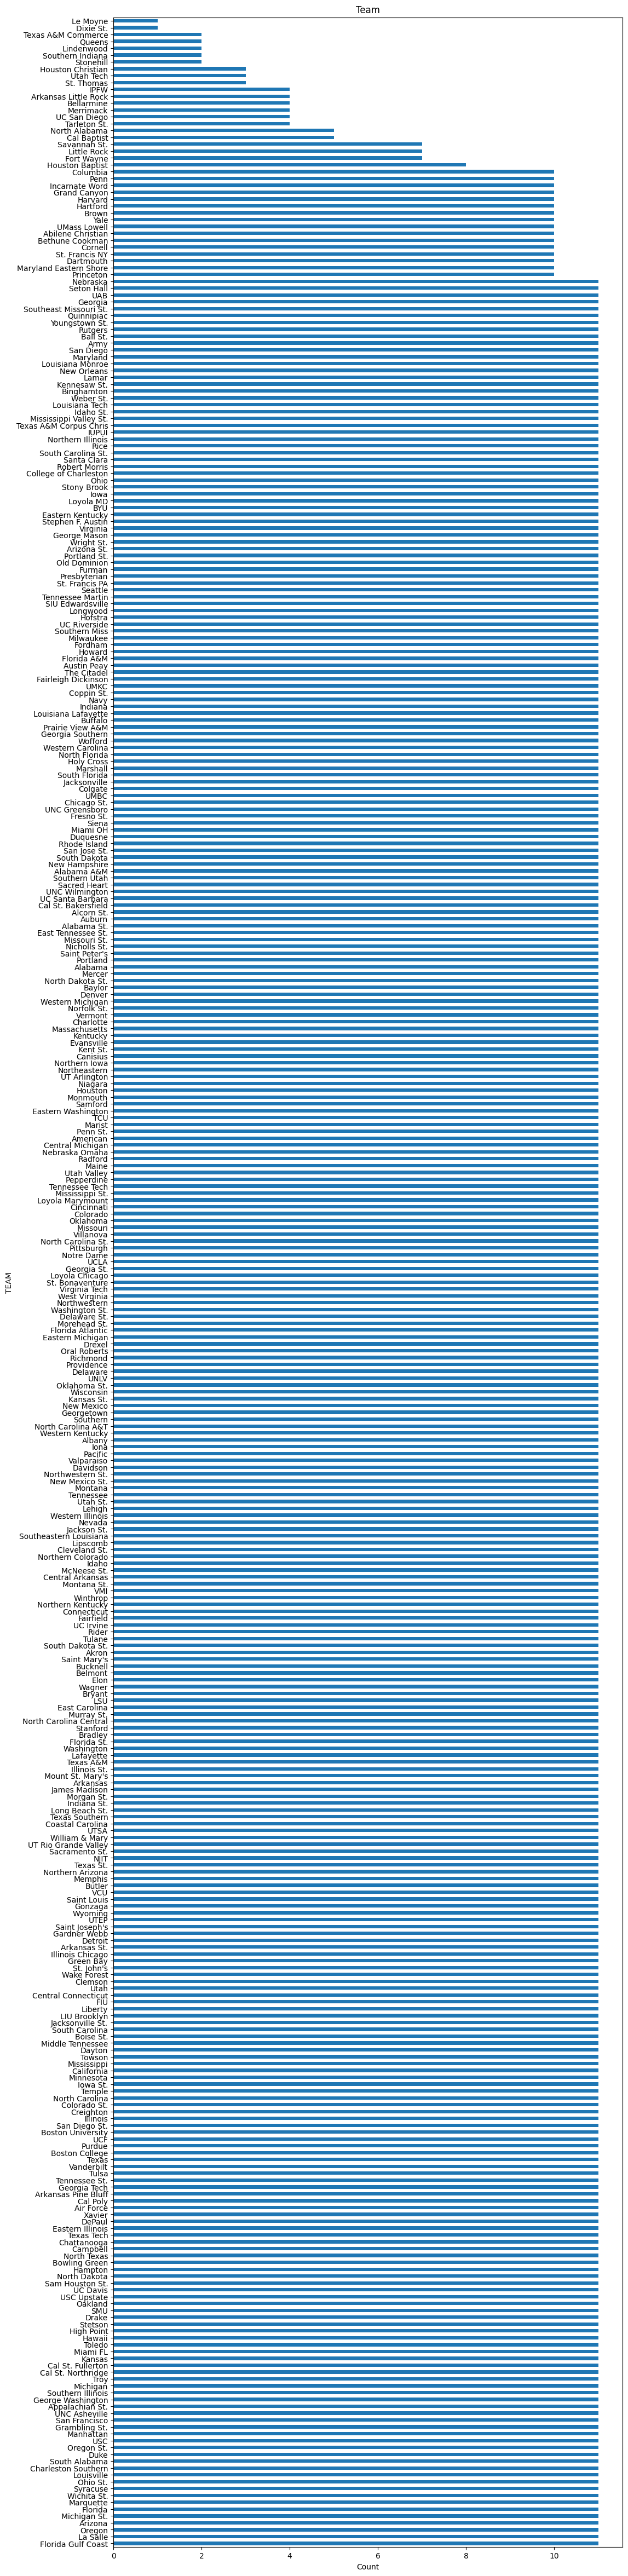

In [ ]:
df['TEAM'].value_counts().plot(kind='barh', figsize=(12, 60), title='Team')
plt.xlabel('Count')

plt.subplots_adjust(wspace=0.5);

#### 1.3.3.4 Distribution of Values to Target Variable

##### 1.3.3.4.1 Average Price to Category Feature

In [ ]:
target_means = df.groupby('CONF')[['W','G']].mean()
target_means.head()

W          G
CONF                      
A10   17.152866  31.369427
ACC   19.598765  33.000000
AE    14.277228  29.297030
ASun  14.551402  29.121495
Amer  17.815789  31.517544

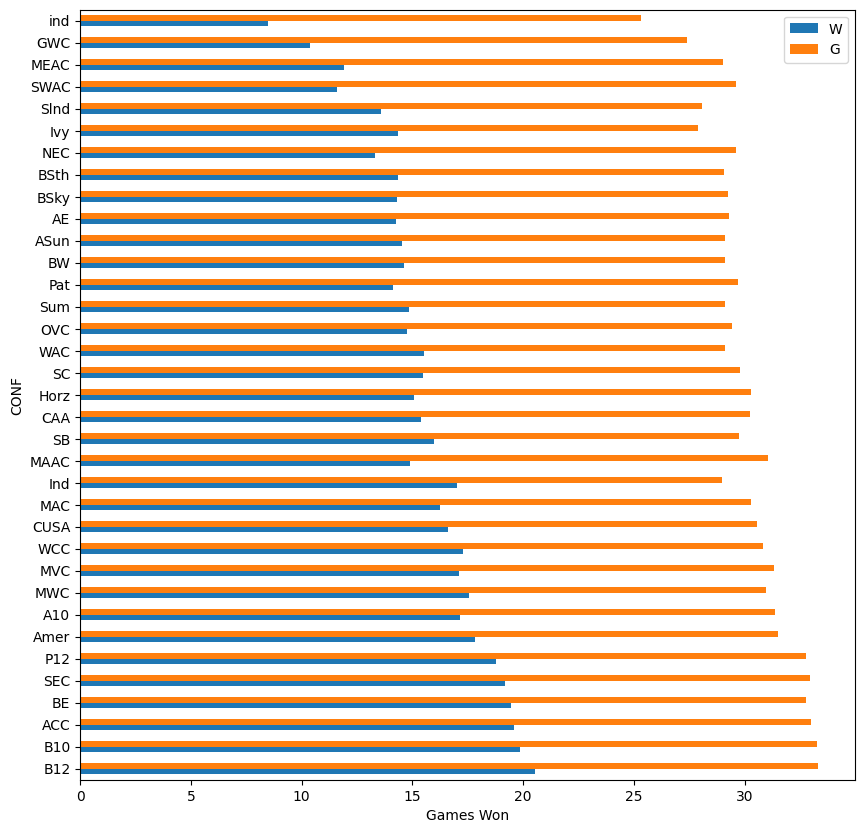

In [ ]:
target_means_sorted = target_means.reindex(index=target_means.mean(axis=1).sort_values(ascending=False).index)

target_means_sorted.plot(kind='barh', figsize=(10, 10))
plt.xlabel('Games Won');

##### 1.3.3.4.2 Distribution of Price by Category Feature

### 1.3.4 Numeric Features

In [ ]:
df.describe().T

count         mean       std       min        25%       50%  \
G        3885.0    30.531532  3.809623     5.000    29.0000    31.000   
W        3885.0    16.075418  6.506570     0.000    11.0000    16.000   
ADJOE    3885.0   103.339743  7.315009    76.600    98.3000   103.000   
ADJDE    3885.0   103.341519  6.490684    84.000    98.6000   103.500   
BARTHAG  3885.0     0.493928  0.255374     0.005     0.2812     0.474   
EFG_O    3885.0    49.935856  3.079803    39.200    47.9000    49.900   
EFG_D    3885.0    50.125946  2.855079    39.600    48.2000    50.100   
TOR      3885.0    18.551223  2.145057    11.900    17.1000    18.500   
TORD     3885.0    18.483115  2.289045    10.200    16.9000    18.400   
ORB      3885.0    29.267310  4.201366    14.400    26.5000    29.300   
DRB      3885.0    29.471918  3.207320    18.400    27.2000    29.400   
FTR      3885.0    34.384813  5.465945    19.600    30.5000    34.200   
FTRD     3885.0    34.645766  6.337450    16.200    30.1000    34.000   
2P_O     3885.0    49.224402  3.416380    37.700    46.9000    49.200   
2P_D     3885.0    49.388880  3.290915    37.700    47.2000    49.400   
3P_O     3885.0    34.141133  2.713812    24.700    32.3000    34.100   
3P_D     3885.0    34.319614  2.406306    26.100    32.7000    34.300   
ADJ_T    3885.0    67.712227  3.037251    57.200    65.7000    67.600   
WAB      3885.0    -7.639967  6.826502   -25.200   -12.6000    -8.100   
SEED      748.0     8.798128  4.671615     1.000     5.0000     9.000   
YEAR     3885.0  2018.403604  3.583747  2013.000  2015.0000  2018.000   

               75%        max  
G          33.0000    40.0000  
W          21.0000    38.0000  
ADJOE     108.1000   129.1000  
ADJDE     108.0000   124.0000  
BARTHAG     0.7164     0.9842  
EFG_O      52.0000    61.0000  
EFG_D      52.0000    60.1000  
TOR        19.9000    27.1000  
TORD       19.9000    28.5000  
ORB        32.0000    43.6000  
DRB        31.6000    40.4000  
FTR        38.0000    58.6000  
FTRD       38.6000    60.7000  
2P_O       51.4000    64.0000  
2P_D       51.7000    61.2000  
3P_O       35.9000    44.1000  
3P_D       35.9000    43.1000  
ADJ_T      69.7000    83.4000  
WAB        -3.0000    13.1000  
SEED       13.0000    16.0000  
YEAR     2022.0000  2024.0000

### 1.3.4.1 Distribution of Feature Values

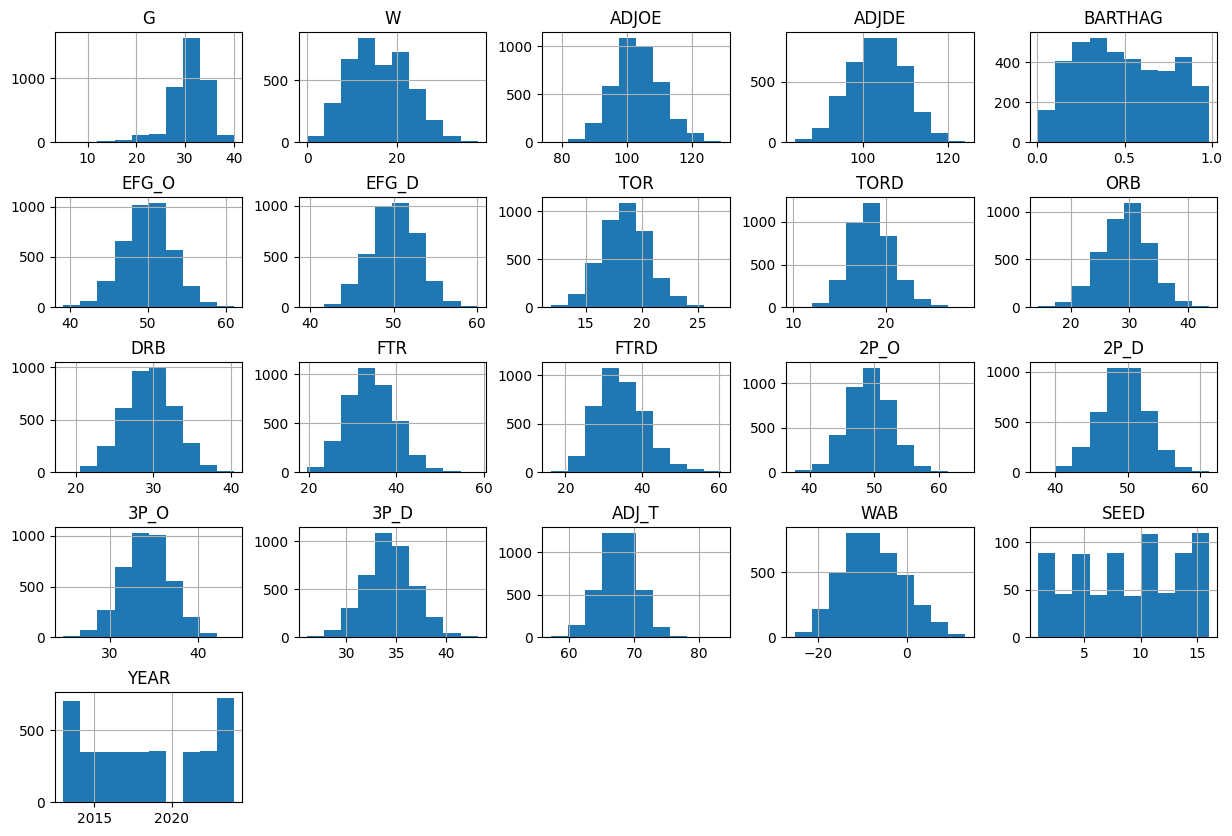

In [ ]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

## 1.4 Drop Rows Missing Target Feature

In [ ]:
missing_price = df[['W']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    100.0
Name: count, dtype: float64

In [ ]:
df[['W']].isnull().sum()

W    0
dtype: int64

In [ ]:
df = df[missing_price != ]

## 1.5 Review Distributions

In [ ]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

## 1.6 Exogeneous Data

In [ ]:
url = ''
df2 = pd.read_html(url)

In [ ]:
type(df2)

In [ ]:
len(df2)

In [ ]:
df2 = df2[0]
df2.head()

## 1.7 Target Feature

In [ ]:
df.plot(x='Target1', y='Target2', kind='scatter');

In [ ]:
df.loc[df[''] == '', ['Target1', 'Target2']]

In [ ]:
df[['', '']].isnull().sum()

In [ ]:
df.drop(columns=['SEED','POSTSEASON'], inplace=True)
#df.dropna(subset=[''], inplace=True)

In [ ]:
df.shape

(3885, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885 entries, 0 to 3884
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TEAM     3885 non-null   object 
 1   CONF     3885 non-null   object 
 2   G        3885 non-null   int64  
 3   W        3885 non-null   int64  
 4   ADJOE    3885 non-null   float64
 5   ADJDE    3885 non-null   float64
 6   BARTHAG  3885 non-null   float64
 7   EFG_O    3885 non-null   float64
 8   EFG_D    3885 non-null   float64
 9   TOR      3885 non-null   float64
 10  TORD     3885 non-null   float64
 11  ORB      3885 non-null   float64
 12  DRB      3885 non-null   float64
 13  FTR      3885 non-null   float64
 14  FTRD     3885 non-null   float64
 15  2P_O     3885 non-null   float64
 16  2P_D     3885 non-null   float64
 17  3P_O     3885 non-null   float64
 18  3P_D     3885 non-null   float64
 19  ADJ_T    3885 non-null   float64
 20  WAB      3885 non-null   float64
 21  YEAR     3885 

### 1.7.1 Number of Missing Values by Row

In [ ]:
missing = pd.concat([df.isnull().sum(axis=1), 100 * df.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

count    %
3884      0  0.0
0         0  0.0
1         0  0.0
2         0  0.0
3         0  0.0
4         0  0.0
5         0  0.0
6         0  0.0
7         0  0.0
8         0  0.0

In [ ]:
missing['%'].unique()

array([0.])

In [ ]:
missing['%'].value_counts()

%
0.0    3885
Name: count, dtype: int64

## 1.8 Save Data

In [ ]:
import os
import pickle

def save_file(data, filename, datapath):
    """Saves data to a file in the specified directory, supporting CSV and pickle formats."""
    if not os.path.exists(datapath):
        os.makedirs(datapath)
    file_path = os.path.join(datapath, filename)

    if filename.endswith('.csv'):
        data.to_csv(file_path, index=False)
        print(f"DataFrame saved to {file_path}")
    elif filename.endswith('.pkl'):
        with open(file_path, 'wb') as f:
            pickle.dump(data, f)
        print(f"Model saved to {file_path}")
    else:
        print(f"Unsupported file format for {filename}")

In [ ]:
datapath = '/content/drive/MyDrive/Data'
save_file(df, 'cbb_cleaned.csv', datapath)

DataFrame saved to /content/drive/MyDrive/Data/cbb_cleaned.csv


In [ ]:
datapath = '../data'
save_file(df2, 'df2.csv', datapath)

# 2.0 Exploratory Data Analysis

## Univariate Analysis

In [ ]:
def plot_compare(feat_name, description, conf=None, figsize=(10, 5)):
    """Graphically compare distributions of features.

    Plot histogram of values for all resorts and reference line to mark
    Boise State's position.

    Arguments:
    feat_name - the feature column name in the data
    description - text description of the feature
    conf - select a specific conference (None for all conferences)
    figsize - (optional) figure size
    """
    boise_st = df[df['TEAM'] == 'Boise St.']

    plt.subplots(figsize=figsize)
    # quirk that hist sometimes objects to NaNs, sometimes doesn't
    # filtering only for finite values tidies this up
    if conf is None:
        ski_x = df[feat_name]
    else:
        ski_x = df.loc[df.CONF == conf, feat_name]
    ski_x = ski_x[np.isfinite(ski_x)]
    plt.hist(ski_x, bins=30)
    # Calculate the mean value for Boise State to plot a single vertical line
    boise_st_mean_feat = boise_st[feat_name].mean()
    plt.axvline(x=boise_st_mean_feat, c='r', ls='--', alpha=0.8, label='Boise St. (Mean)')
    plt.xlabel(description)
    plt.ylabel('frequency')
    plt.title(description + ' distribution for teams in market share')
    plt.legend()

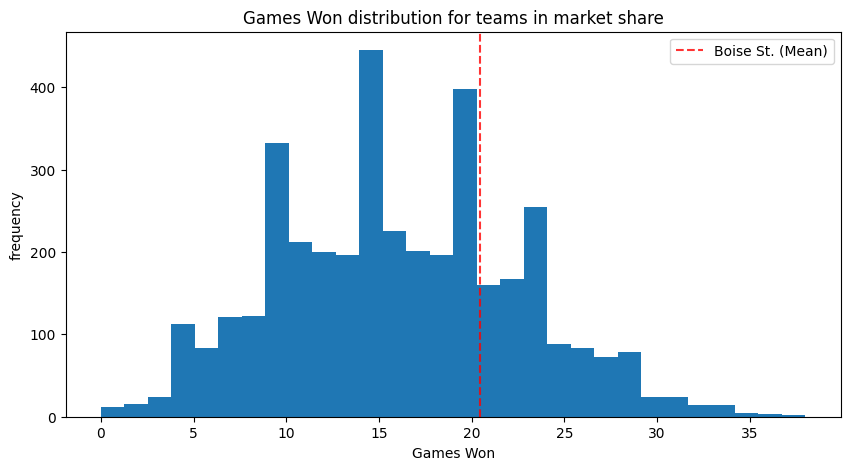

In [ ]:
plot_compare('W', 'Games Won')

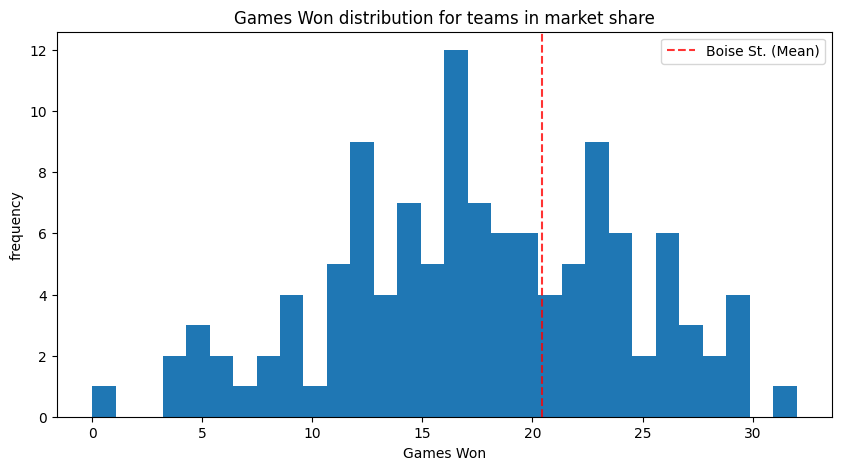

In [ ]:
plot_compare('W', 'Games Won', conf='MWC')

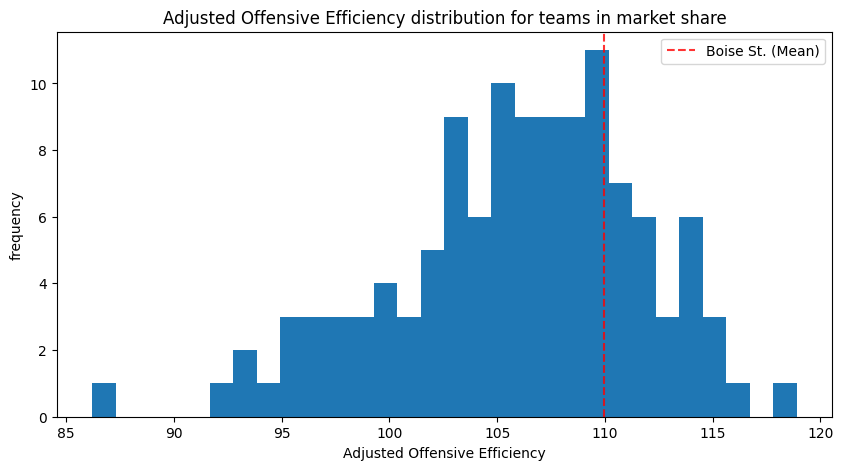

In [ ]:
plot_compare('ADJOE', 'Adjusted Offensive Efficiency', conf='MWC')

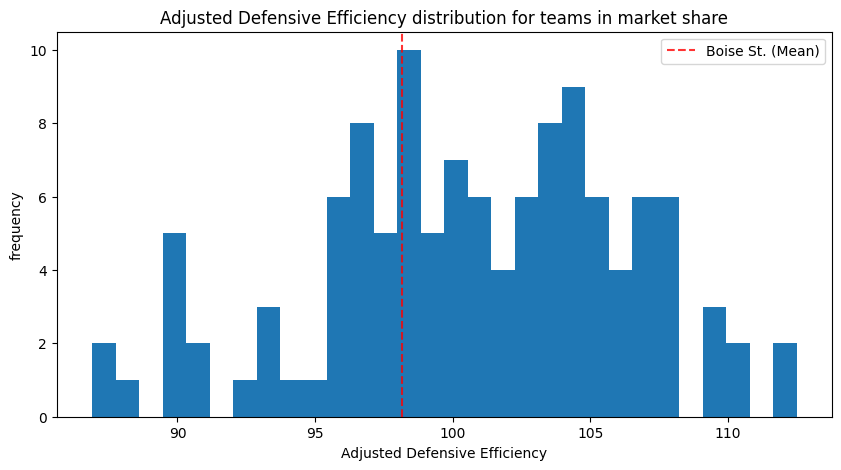

In [ ]:
plot_compare('ADJDE','Adjusted Defensive Efficiency', conf='MWC')

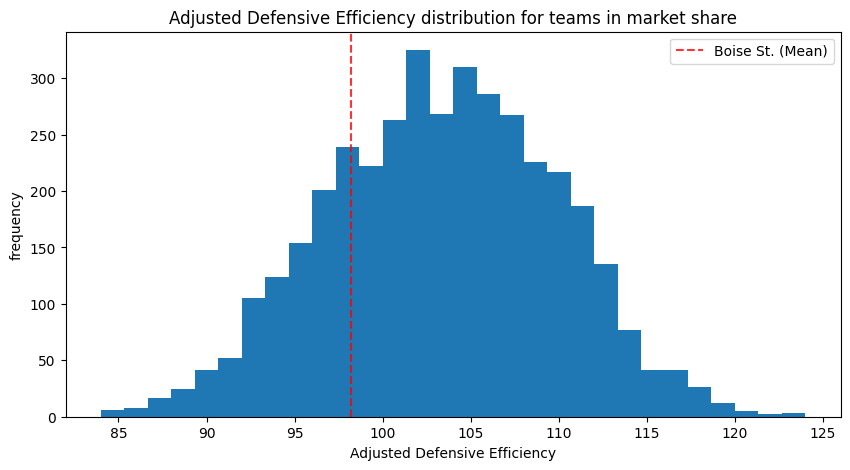

In [ ]:
plot_compare('ADJDE', 'Adjusted Defensive Efficiency')

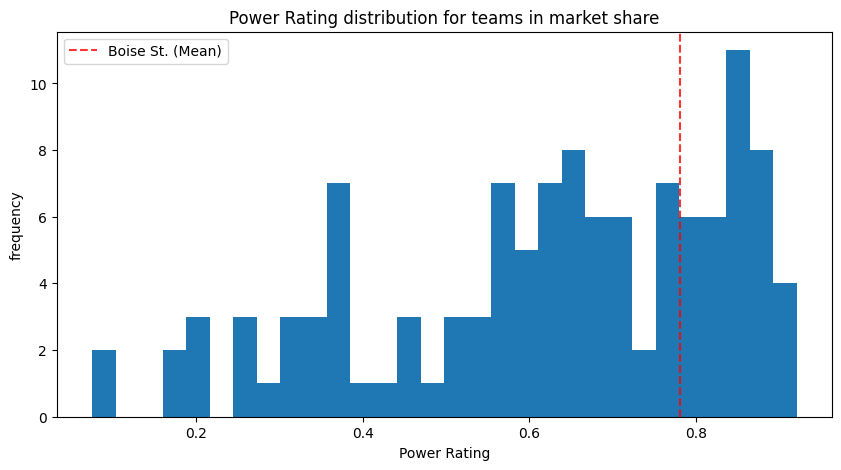

In [ ]:
plot_compare('BARTHAG', 'Power Rating', conf='MWC')

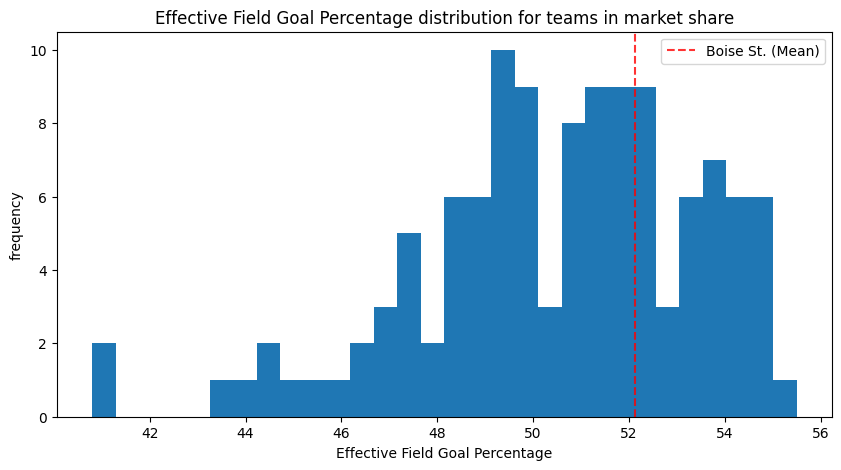

In [ ]:
plot_compare('EFG_O', 'Effective Field Goal Percentage', conf='MWC')

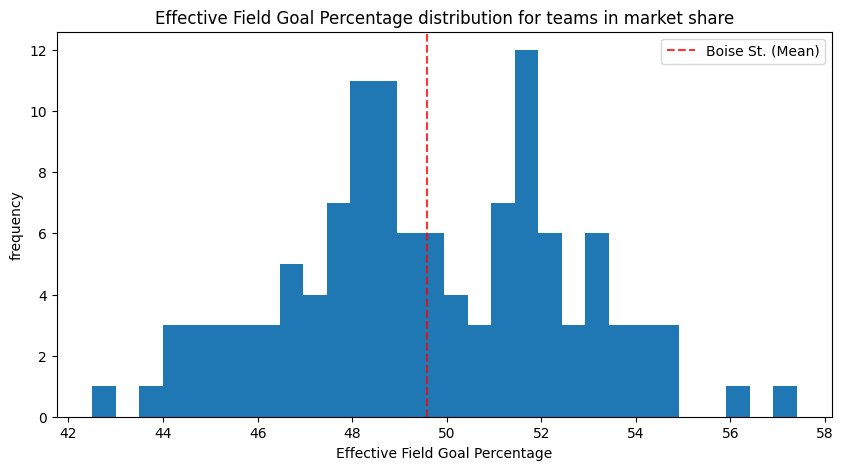

In [ ]:
plot_compare('EFG_D', 'Effective Field Goal Percentage', conf='MWC')

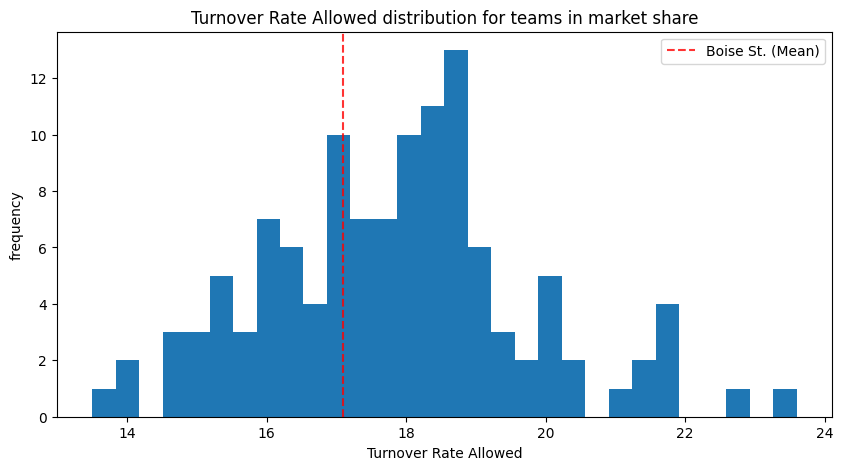

In [ ]:
plot_compare('TOR', 'Turnover Rate Allowed', conf='MWC')

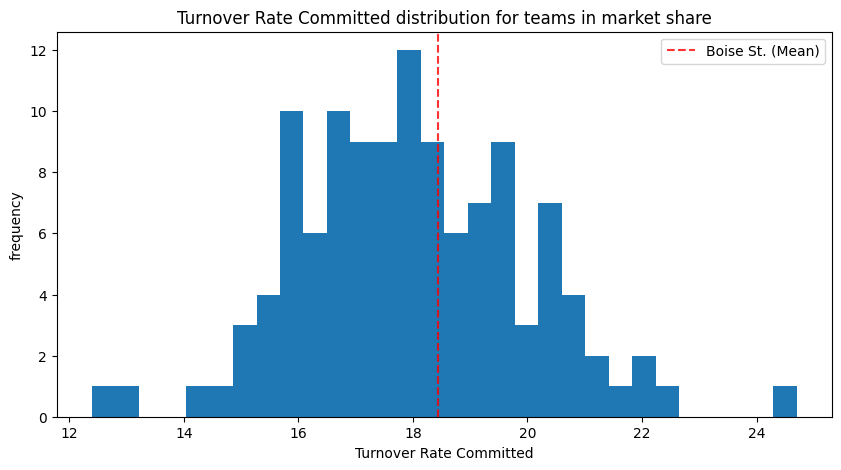

In [ ]:
plot_compare('TORD', 'Turnover Rate Committed', conf='MWC')

In [ ]:
plot_compare('ORB', 'Offensive Rebound Rate', conf='MWC')

In [ ]:
plot_compare('DRB', 'Offenseive Rebound Rate Allowed', conf='MWC')

In [ ]:
plot_compare('FTR', 'Free Throw Rate', conf='MWC')

In [ ]:
plot_compare('FTRD', 'Free Throw Rate Allowed', conf='MWC')

In [ ]:
plot_compare('2P_O', 'Two-Point Shooting Percentage', conf='MWC')

In [ ]:
plot_compare('2P_D', 'Two-Point Shooting Percentage Allowed', conf='MWC')

In [ ]:
plot_compare('3P_O', 'Three-Point Shooting Percentage', conf='MWC')

In [ ]:
plot_compare('3P_D', 'Three-Point Shooting Percentage Allowed', conf='MWC')

In [ ]:
plot_compare('ADJ_T', 'Adjusted Tempo', conf='MWC')

In [ ]:
plot_compare('WAB', 'Wins Above Bubble', conf='MWC')

## Bi-variate Analysis

In [ ]:
def plot_scatter_by_filters(df, x_col, y_col, conf=None, year=None, xlabel=None, ylabel=None, title=None):
    """
    Generates a scatter plot of two numeric columns, with optional filtering by conference and year.

    Args:
        df (pd.DataFrame): The input DataFrame.
        x_col (str): The name of the column for the x-axis.
        y_col (str): The name of the column for the y-axis.
        conf (str, optional): The conference to filter by. Defaults to None (plot all conferences).
        year (int, optional): The year to filter by. Defaults to None (plot all years).
        xlabel (str, optional): The label for the x-axis. Defaults to the x_col name.
        ylabel (str, optional): The label for the y-axis. Defaults to the y_col name.
        title (str, optional): The title of the plot. Defaults to a generated title.
    """
    df_filtered = df.copy()

    if conf:
        df_filtered = df_filtered[df_filtered['CONF'] == conf]
        if df_filtered.empty:
            print(f"No data found for conference: {conf}")
            return

    if year:
        df_filtered = df_filtered[df_filtered['YEAR'] == year]
        if df_filtered.empty:
            print(f"No data found for year: {year}")
            return

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_filtered, x=x_col, y=y_col)

    if xlabel is None:
        xlabel = x_col
    if ylabel is None:
        ylabel = y_col
    if title is None:
        title = f'{y_col} vs {x_col}'
        if conf and year:
            title += f' for {conf} Conference in {year}'
        elif conf:
            title += f' for {conf} Conference'
        elif year:
            title += f' in {year}'

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

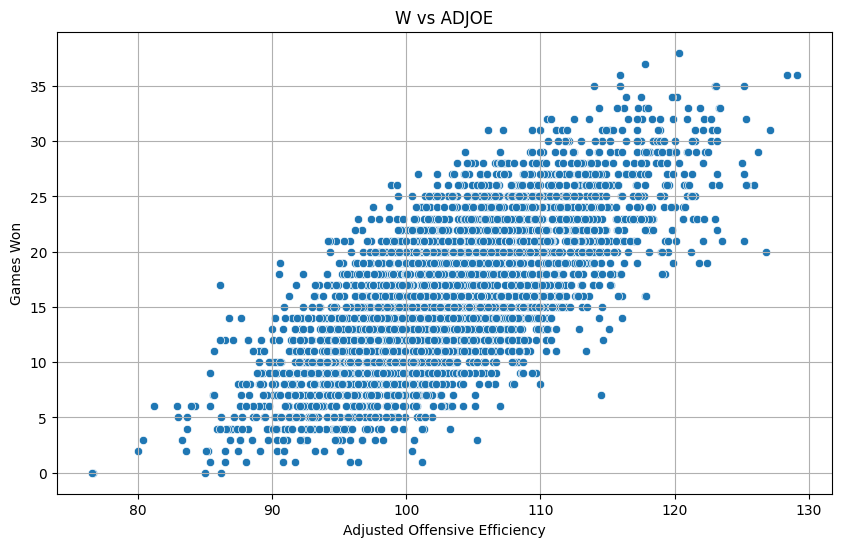

In [ ]:
plot_scatter_by_filters(df, x_col='ADJOE', y_col='W', xlabel='Adjusted Offensive Efficiency', ylabel='Games Won')

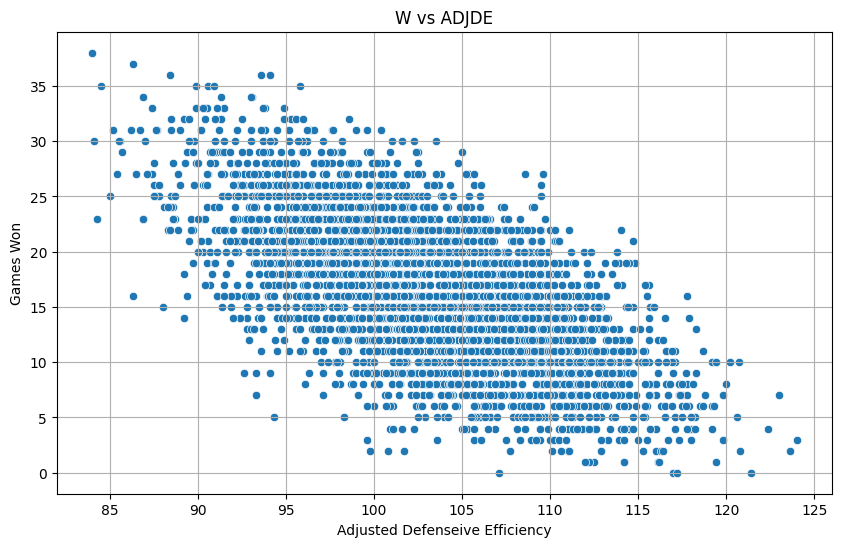

In [ ]:
plot_scatter_by_filters(df, x_col='ADJDE', y_col='W', xlabel='Adjusted Defenseive Efficiency', ylabel='Games Won')

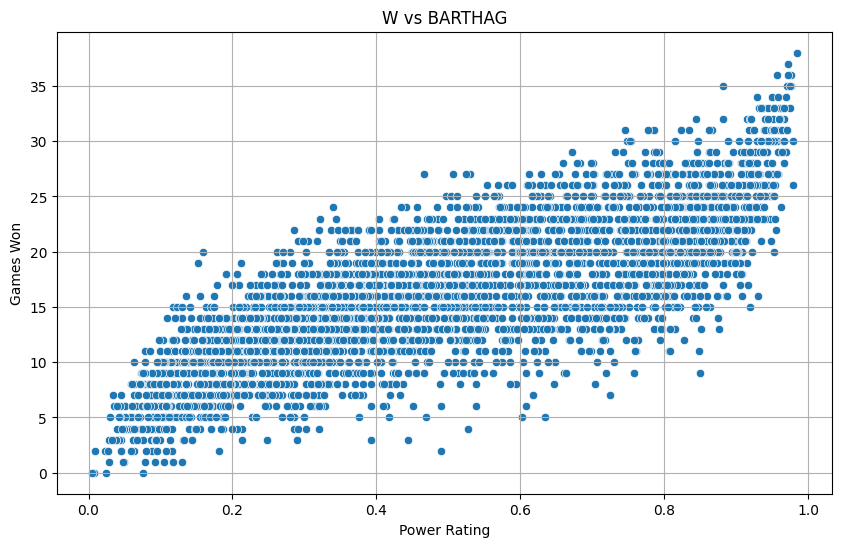

In [ ]:
plot_scatter_by_filters(df, x_col='BARTHAG', y_col='W', xlabel='Power Rating', ylabel='Games Won')

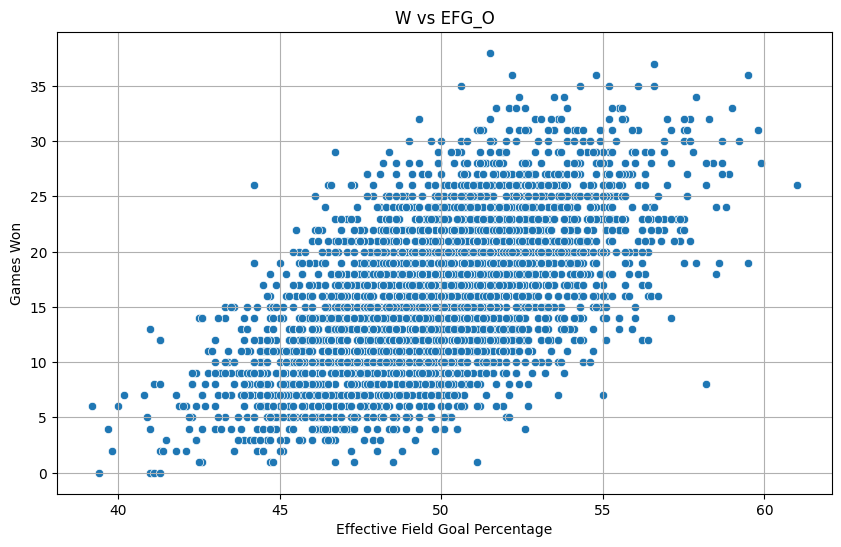

In [ ]:
plot_scatter_by_filters(df, x_col='EFG_O', y_col='W', xlabel='Effective Field Goal Percentage', ylabel='Games Won')

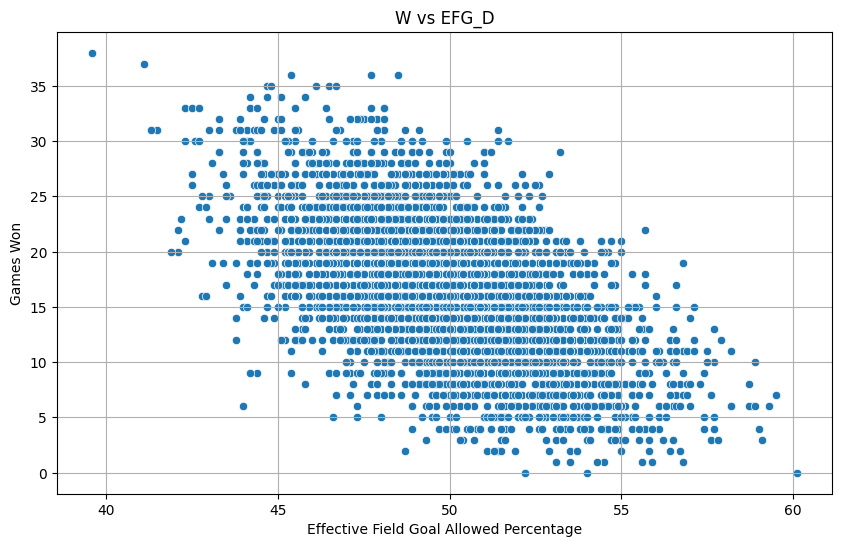

In [ ]:
plot_scatter_by_filters(df, x_col='EFG_D', y_col='W', xlabel='Effective Field Goal Allowed Percentage', ylabel='Games Won')

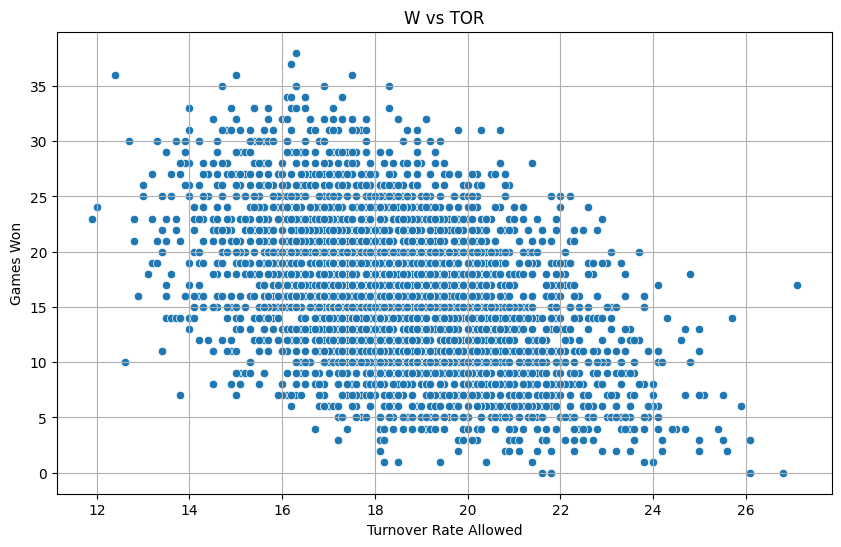

In [ ]:
plot_scatter_by_filters(df, x_col='TOR', y_col='W', xlabel='Turnover Rate Allowed', ylabel='Games Won')

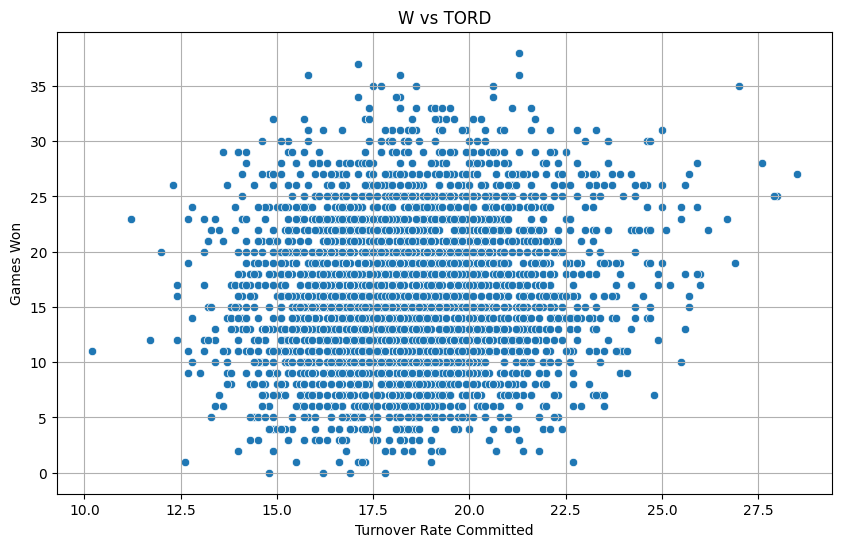

In [ ]:
plot_scatter_by_filters(df, x_col='TORD', y_col='W', xlabel='Turnover Rate Committed', ylabel='Games Won')

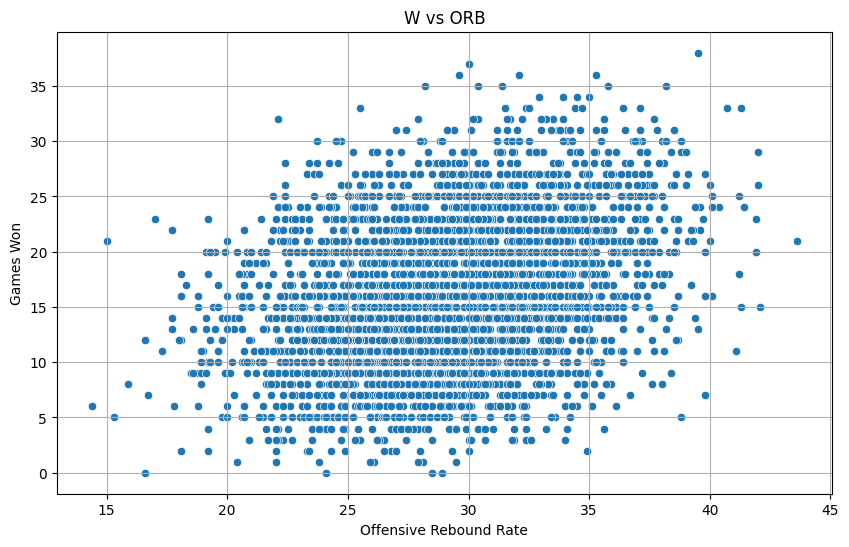

In [ ]:
plot_scatter_by_filters(df, x_col='ORB', y_col='W', xlabel='Offensive Rebound Rate', ylabel='Games Won')

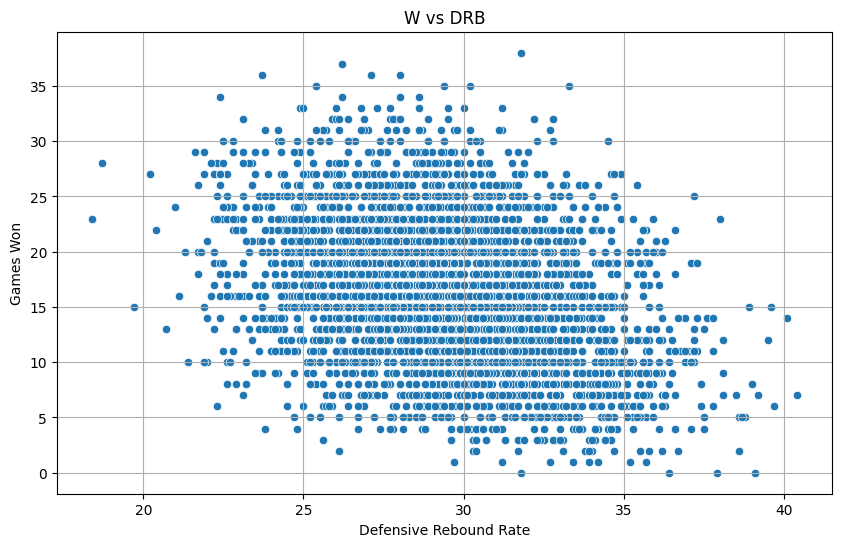

In [ ]:
plot_scatter_by_filters(df, x_col='DRB', y_col='W', xlabel='Offensive Rebound Rate Allowed', ylabel='Games Won')

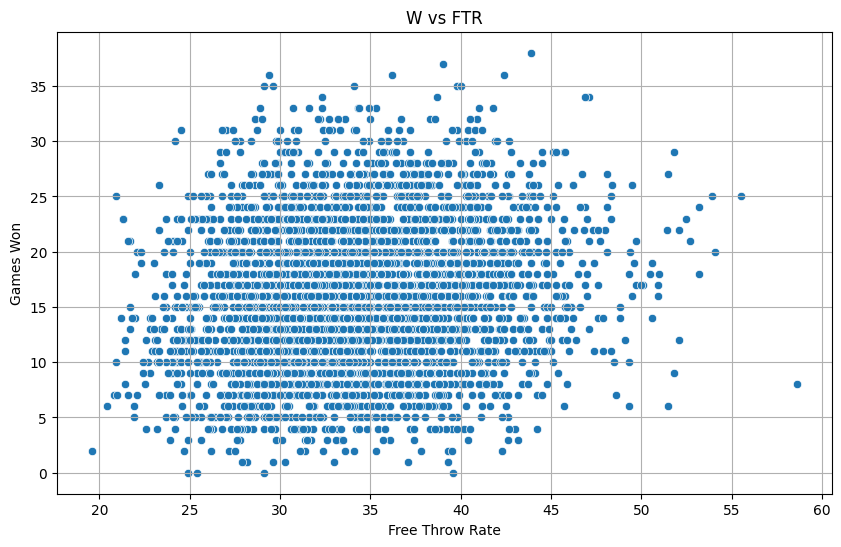

In [ ]:
plot_scatter_by_filters(df, x_col='FTR', y_col='W', xlabel='Free Throw Rate', ylabel='Games Won')

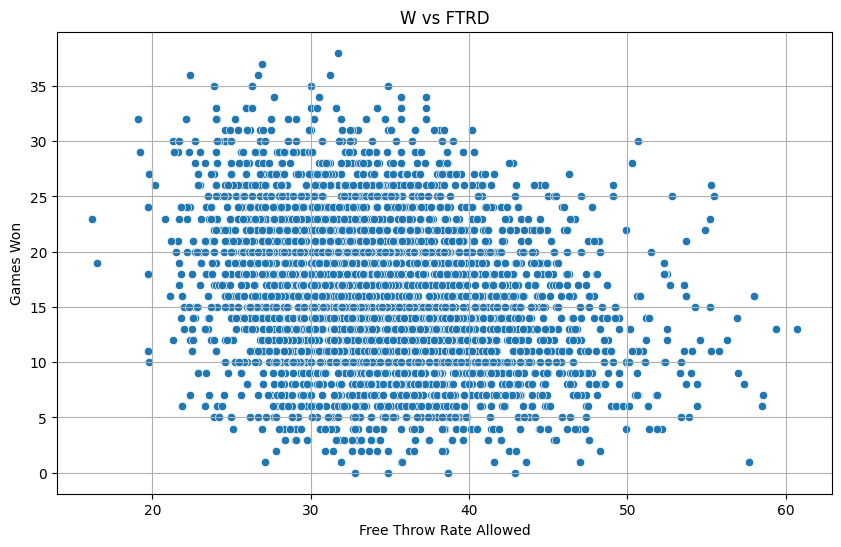

In [ ]:
plot_scatter_by_filters(df, x_col='FTRD', y_col='W', xlabel='Free Throw Rate Allowed', ylabel='Games Won')

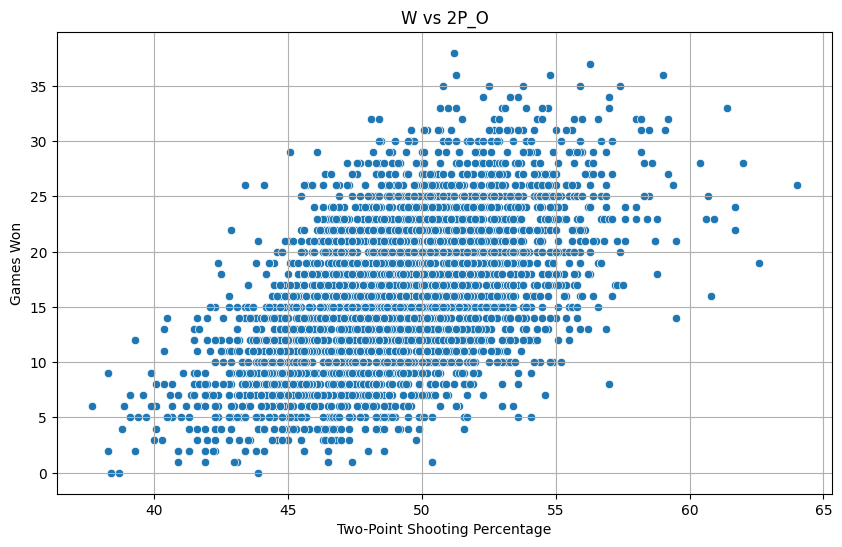

In [ ]:
plot_scatter_by_filters(df, x_col='2P_O', y_col='W', xlabel='Two-Point Shooting Percentage', ylabel='Games Won')

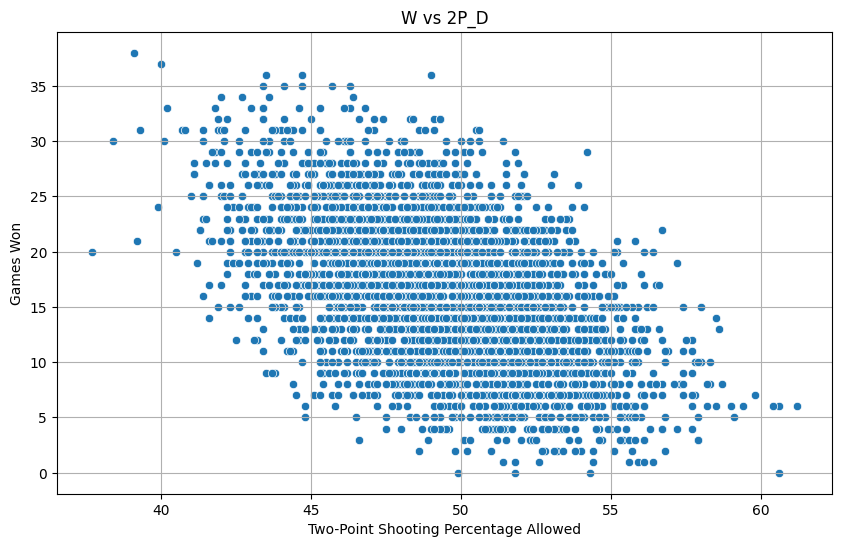

In [ ]:
plot_scatter_by_filters(df, x_col='2P_D', y_col='W', xlabel='Two-Point Shooting Percentage Allowed', ylabel='Games Won')

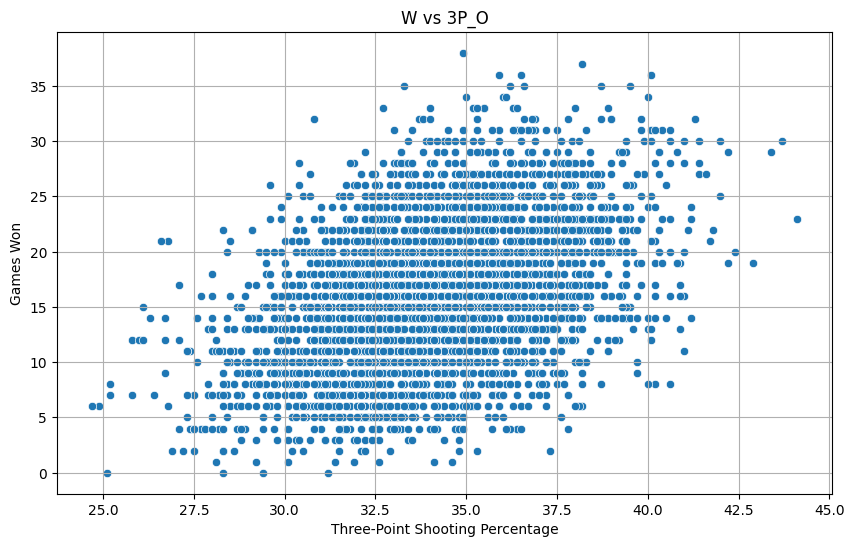

In [ ]:
plot_scatter_by_filters(df, x_col='3P_O', y_col='W', xlabel='Three-Point Shooting Percentage', ylabel='Games Won')

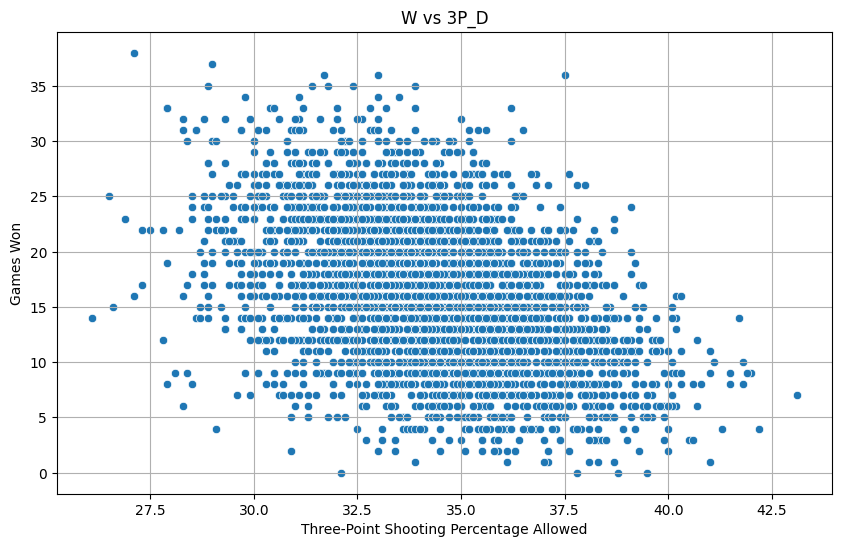

In [ ]:
plot_scatter_by_filters(df, x_col='3P_D', y_col='W', xlabel='Three-Point Shooting Percentage Allowed', ylabel='Games Won')

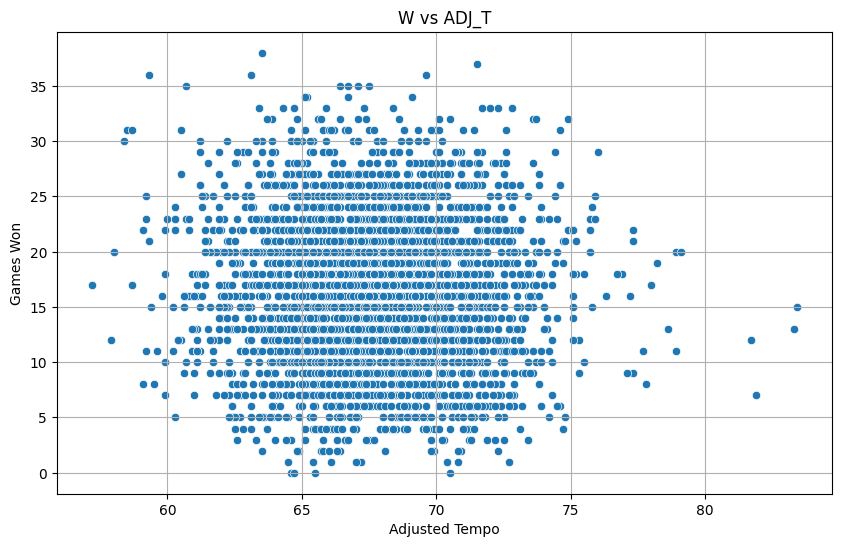

In [ ]:
plot_scatter_by_filters(df, x_col='ADJ_T', y_col='W', xlabel='Adjusted Tempo', ylabel='Games Won')

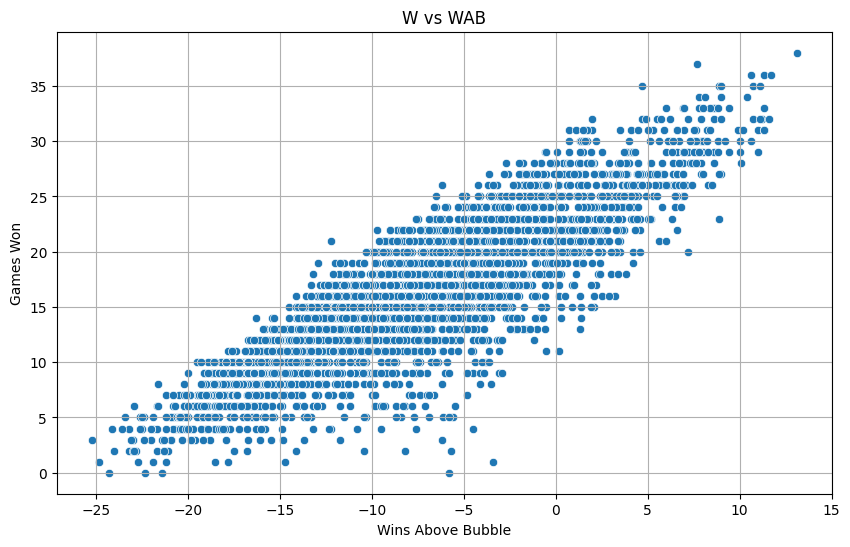

In [ ]:
plot_scatter_by_filters(df, x_col='WAB', y_col='W', xlabel='Wins Above Bubble', ylabel='Games Won')

In [ ]:
def plot_team_performance_over_years(df, y_col, conf=None, ylabel=None, highlight_team=None):
    """
    Generates a line plot showing a numeric performance metric over the years for each team,
    optionally filtered by conference, and highlights a specific team.

    Args:
        df (pd.DataFrame): The input DataFrame with 'TEAM', 'YEAR', and the specified y_col.
        y_col (str): The name of the numeric column to plot on the y-axis.
        conf (str, optional): The conference to filter by. Defaults to None (plot all teams).
        ylabel (str, optional): The label for the y-axis. Defaults to the y_col name.
        highlight_team (str, optional): The name of the team to highlight. Defaults to None.
    """
    plt.figure(figsize=(15, 8))

    if conf:
        df_filtered = df[df['CONF'] == conf].copy()
        if df_filtered.empty:
            print(f"No teams found for conference: {conf}")
            return
        teams = df_filtered['TEAM'].unique()
        plt.title(f'{y_col} Over Years for Teams in {conf} Conference')
    else:
        df_filtered = df.copy()
        teams = df_filtered['TEAM'].unique()
        plt.title(f'{y_col} Over Years for Each Team')

    if ylabel is None:
        ylabel = y_col

    for team in teams:
        team_data = df_filtered[df_filtered['TEAM'] == team].sort_values(by='YEAR')
        if team == highlight_team:
            plt.plot(team_data['YEAR'], team_data[y_col], marker='o', linestyle='-', label=team, color='red', linewidth=2)
        else:
            plt.plot(team_data['YEAR'], team_data[y_col], marker='o', linestyle='-', label=team if len(teams) < 20 else "_nolegend_", alpha=0.5) # Add label for legend if not too many teams


    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.grid(True)

    # Add legend only if there are not too many teams or a team is highlighted
    if len(teams) < 20 or highlight_team:
        plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

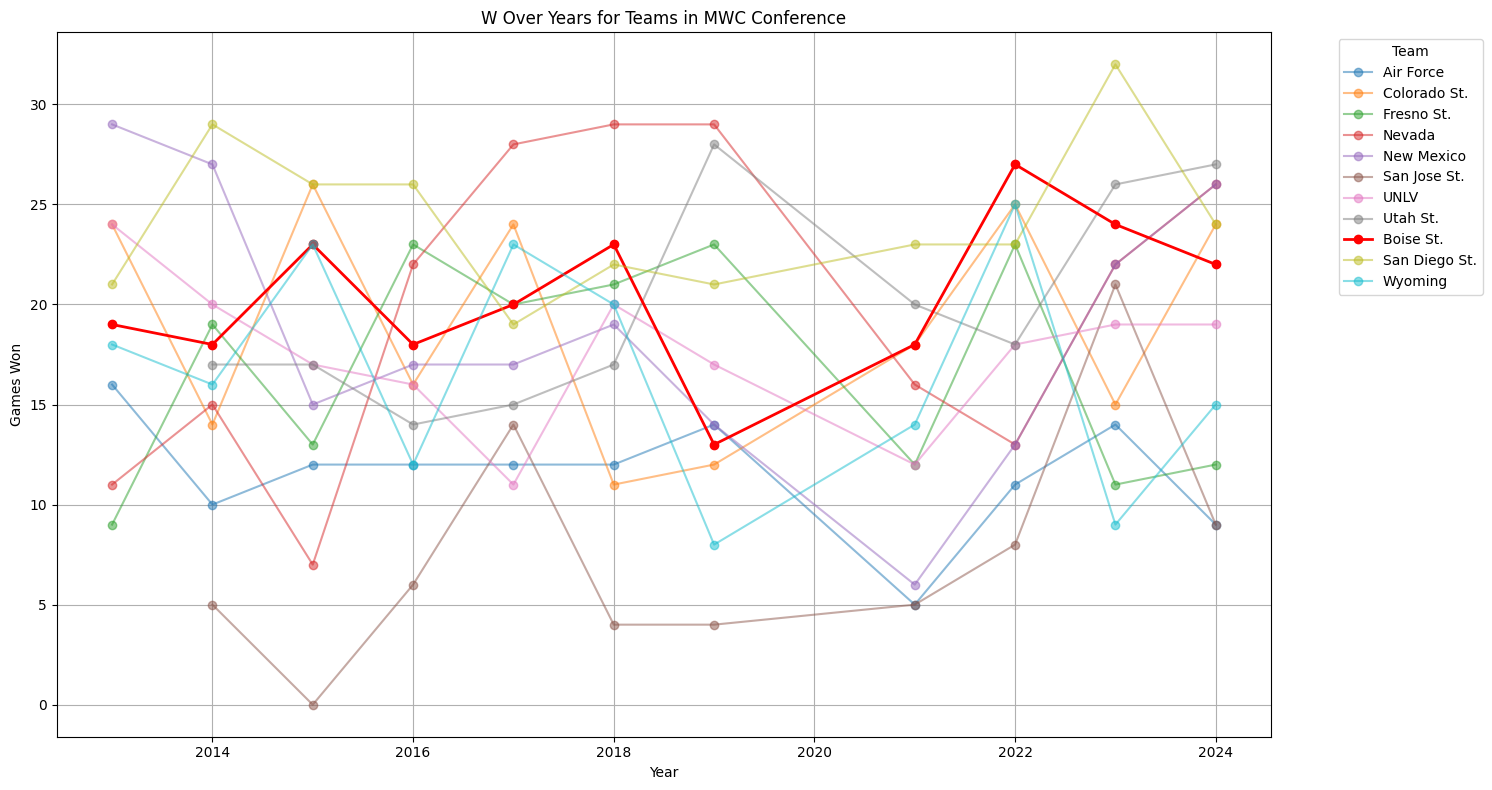

In [ ]:
plot_team_performance_over_years(df, 'W', conf='MWC', ylabel='Games Won', highlight_team='Boise St.')

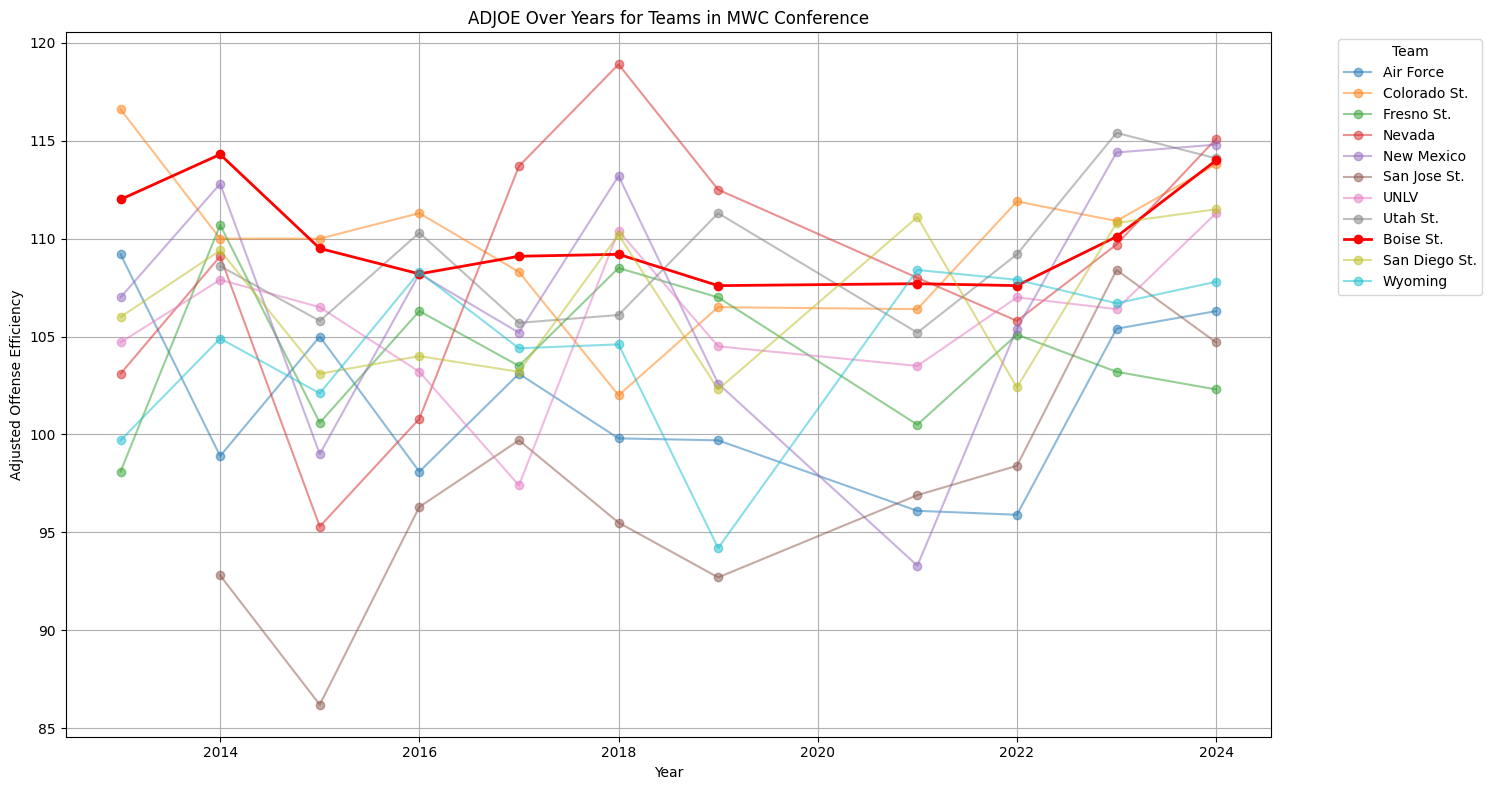

In [ ]:
plot_team_performance_over_years(df, 'ADJOE', conf='MWC', ylabel='Adjusted Offense Efficiency', highlight_team='Boise St.')

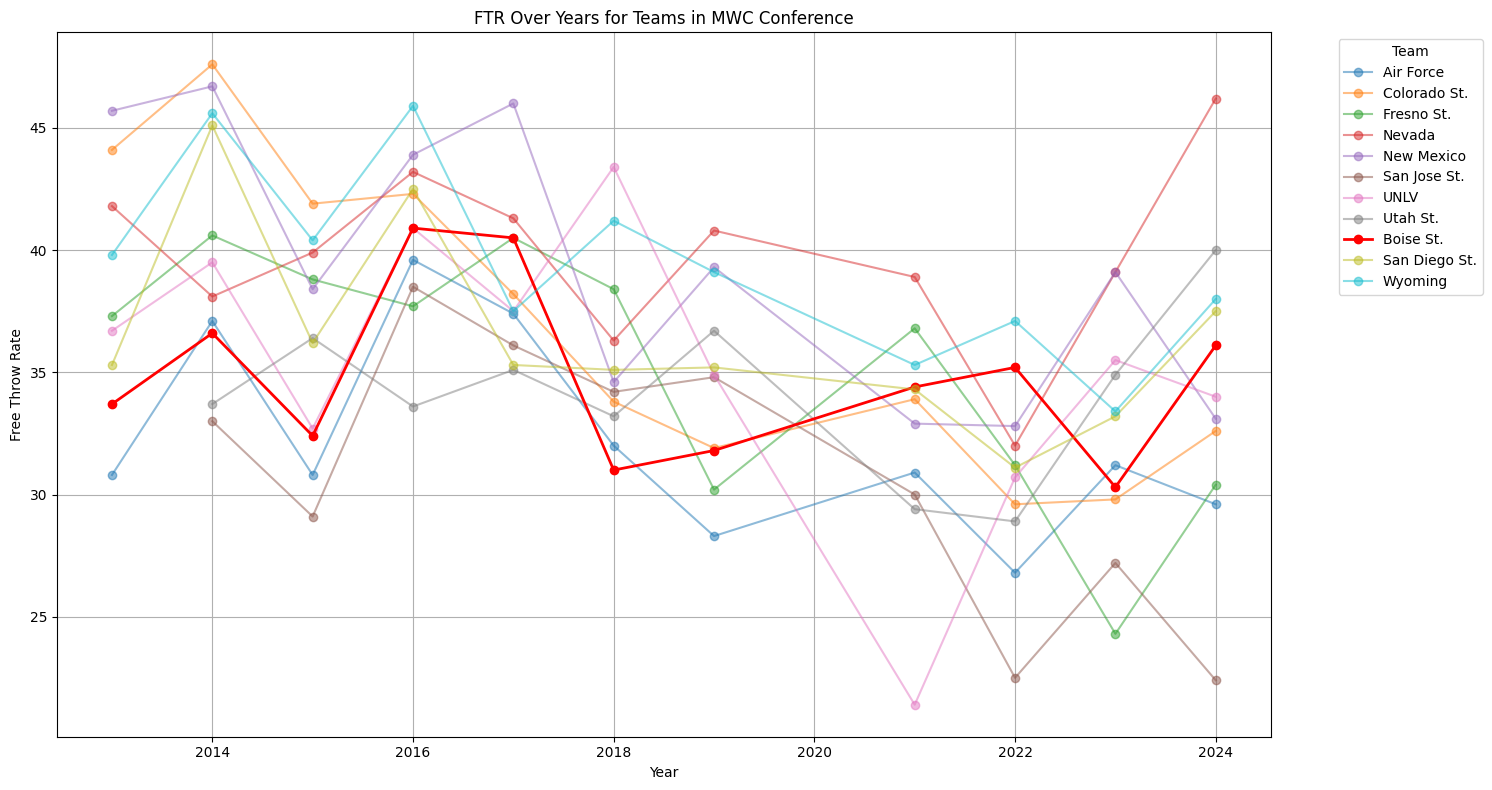

In [ ]:
plot_team_performance_over_years(df, 'FTR', conf='MWC', ylabel='Free Throw Rate', highlight_team='Boise St.')

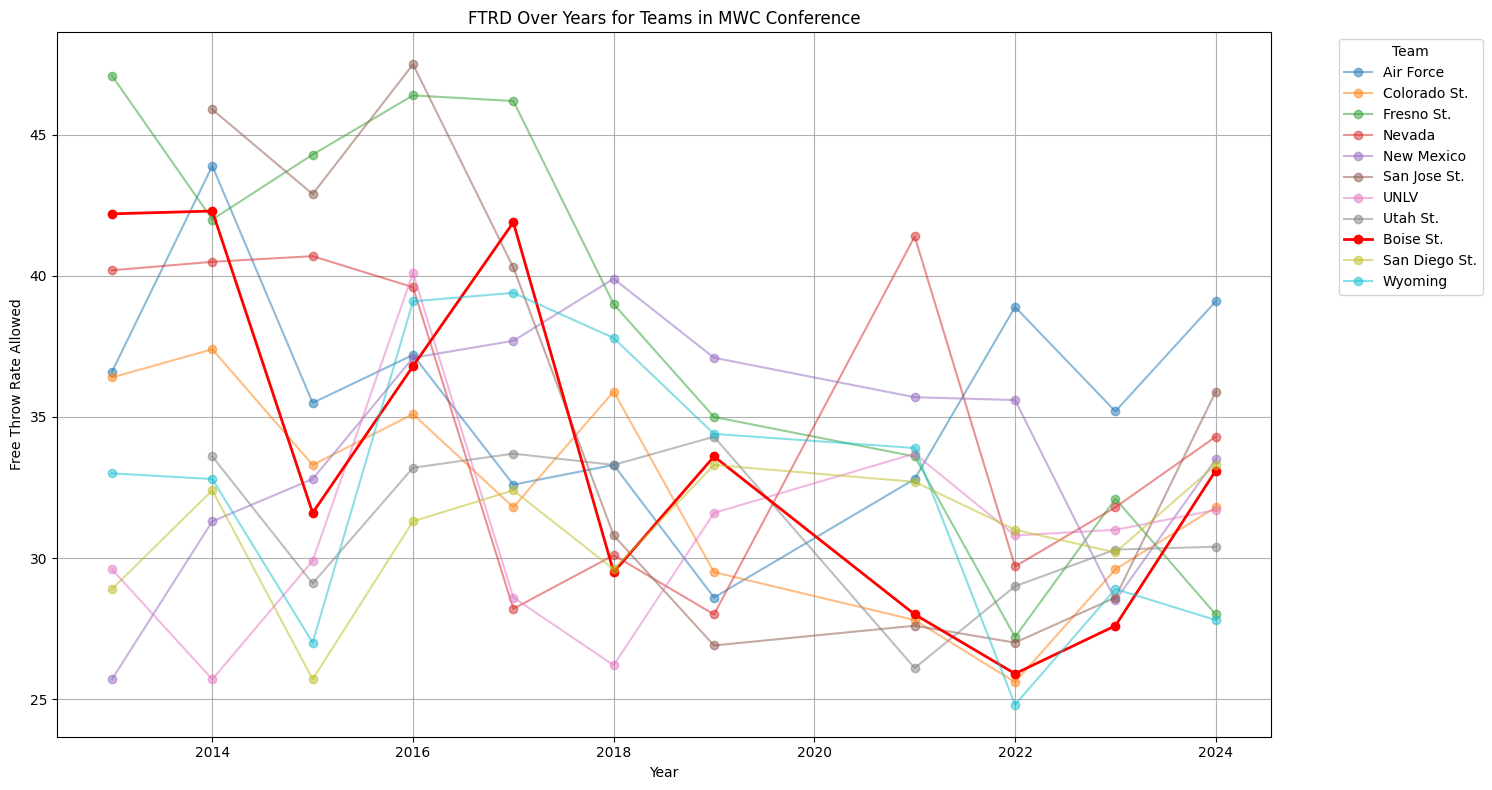

In [ ]:
plot_team_performance_over_years(df, 'FTRD', conf='MWC', ylabel='Free Throw Rate Allowed', highlight_team='Boise St.')

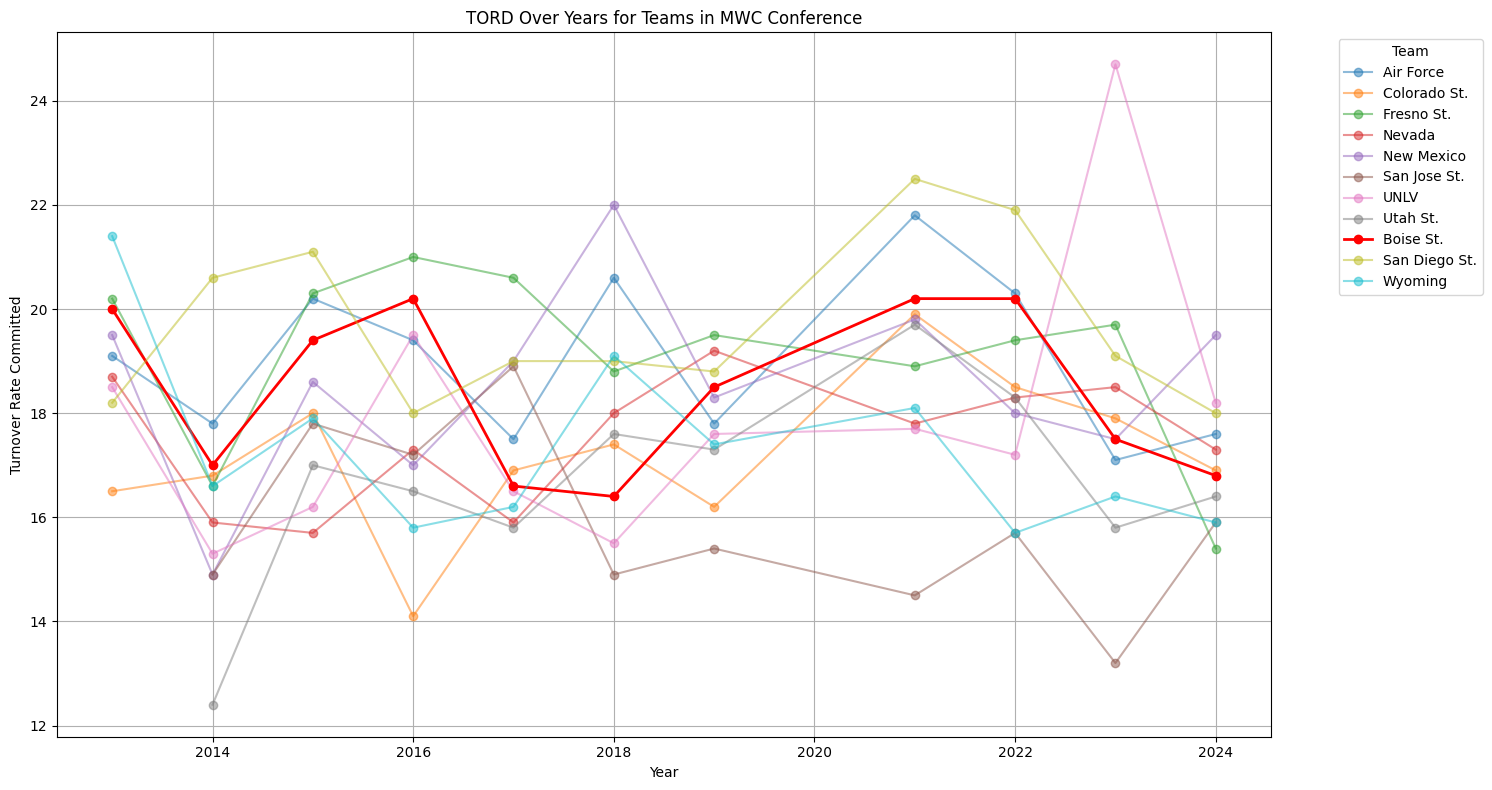

In [ ]:
plot_team_performance_over_years(df, 'TORD', conf='MWC', ylabel='Turnover Rate Committed', highlight_team='Boise St.')

In [ ]:
plot_team_performance_over_years(df, 'ORB', conf='MWC', ylabel='Offensive Rebound Rate', highlight_team='Boise St.')

In [ ]:
plot_team_performance_over_years(df, 'DRB', conf='MWC', ylabel='Defensive Rebound Rate', highlight_team='Boise St.')

In [ ]:
plot_team_performance_over_years(df, '2P_O', conf='MWC', ylabel='Two-Point Shooting Percentage', highlight_team='Boise St.')

In [ ]:
plot_team_performance_over_years(df, '2P_D', conf='MWC', ylabel='Two-Point Shooting Percentage Allowed', highlight_team='Boise St.')

In [ ]:
plot_team_performance_over_years(df, '3P_O', conf='MWC', ylabel='Three-Point Shooting Percentage', highlight_team='Boise St.')

In [ ]:
plot_team_performance_over_years(df, '3P_D', conf='MWC', ylabel='Three-Point Shooting Percentage Allowed', highlight_team='Boise St.')

In [ ]:
plot_team_performance_over_years(df, 'ADJ_T', conf='MWC', ylabel='Adjusted Tempo', highlight_team='Boise St.')

In [ ]:
plot_team_performance_over_years(df, 'WAB', conf='MWC', ylabel='Wins Above Bubble', highlight_team='Boise St.')

## Multi-Variate Analysis

In [ ]:
columns = df.select_dtypes(['int64','float64']).columns.to_list()
team_avg_win = df.groupby('CONF')[columns].mean()
team_avg_win.head()


G          W       ADJOE       ADJDE   BARTHAG      EFG_O  \
CONF                                                                      
A10   31.369427  17.152866  105.400000  100.382166  0.618424  50.139490   
ACC   33.000000  19.598765  111.189506   97.320988  0.786820  51.098765   
AE    29.297030  14.277228   98.630693  106.024752  0.331993  49.346535   
ASun  29.121495  14.551402  101.022430  107.941121  0.336498  50.434579   
Amer  31.517544  17.815789  106.568421   99.407018  0.653688  49.491228   

          EFG_D        TOR       TORD        ORB        DRB        FTR  \
CONF                                                                     
A10   49.328662  18.208280  18.635032  29.000000  28.922930  34.477707   
ACC   48.943210  17.232099  17.932099  30.577160  29.041975  33.558025   
AE    50.392079  18.772277  18.266337  27.062376  28.096040  32.727723   
ASun  51.762617  18.388785  17.586916  28.122430  29.942991  31.768224   
Amer  48.171930  18.192105  18.641228  31.364912  30.283333  34.576316   

           FTRD       2P_O       2P_D       3P_O       3P_D      ADJ_T  \
CONF                                                                     
A10   33.785350  49.782803  48.705732  33.835032  33.634395  67.570064   
ACC   30.607407  50.421605  48.052469  34.856790  33.664198  67.154938   
AE    33.372277  48.491089  49.859406  33.824752  34.210891  67.310891   
ASun  33.457944  49.682243  51.372897  34.487850  34.971028  68.117757   
Amer  33.112281  48.854386  47.208772  33.700000  33.187719  67.503509   

            WAB         YEAR  
CONF                          
A10   -5.710828  2018.388535  
ACC   -0.538025  2018.462963  
AE   -10.936634  2018.425743  
ASun -10.896262  2018.813084  
Amer  -4.335088  2019.070175

In [ ]:
team_avg_win_index = team_avg_win.index

team_avg_win_columns = team_avg_win.columns
team_avg_win_scale = team_avg_win.copy()

team_avg_win_scale = scale(team_avg_win_scale)

team_avg_win_scale = pd.DataFrame(team_avg_win_scale, columns=team_avg_win_columns, index=team_avg_win_index)
team_avg_win_scale.std(ddof=0)

G          1.0
W          1.0
ADJOE      1.0
ADJDE      1.0
BARTHAG    1.0
EFG_O      1.0
EFG_D      1.0
TOR        1.0
TORD       1.0
ORB        1.0
DRB        1.0
FTR        1.0
FTRD       1.0
2P_O       1.0
2P_D       1.0
3P_O       1.0
3P_D       1.0
ADJ_T      1.0
WAB        1.0
YEAR       1.0
dtype: float64

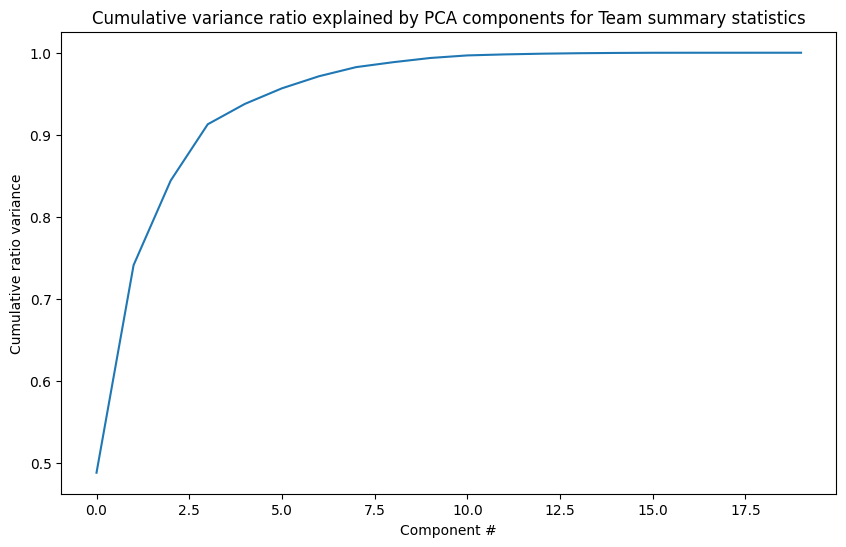

In [ ]:
team_pca = PCA().fit(team_avg_win_scale)

plt.subplots(figsize=(10, 6))
plt.plot(team_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for Team summary statistics');

In [ ]:
team_pca_x = team_pca.transform(team_avg_win_scale)
team_pca_x.shape

(35, 20)

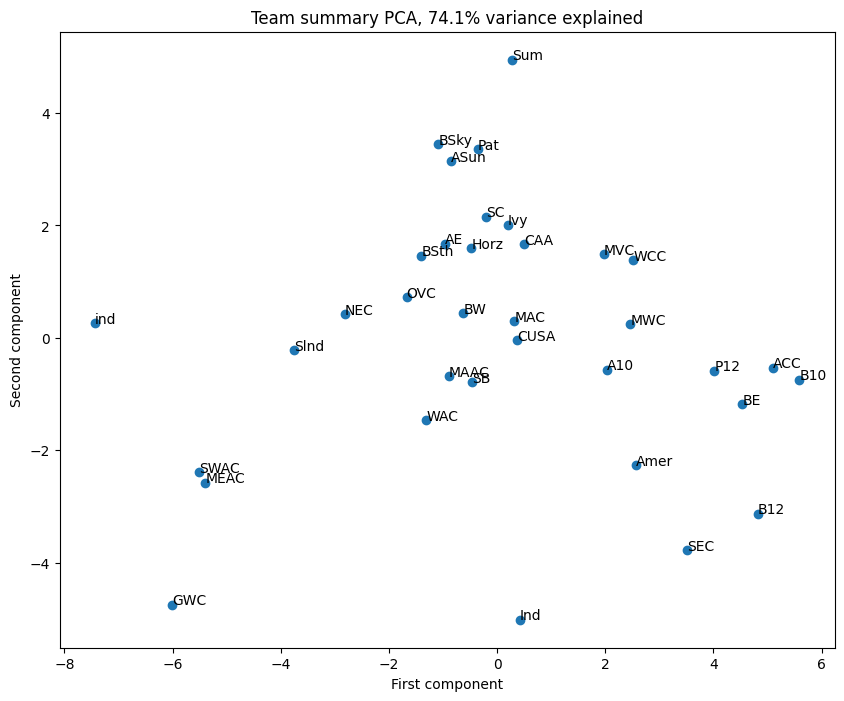

In [ ]:
x = team_pca_x[:, 0]
y = team_pca_x[:, 1]
state = team_avg_win_index
pc_var = 100 * team_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Team summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))


### Feature Correlation

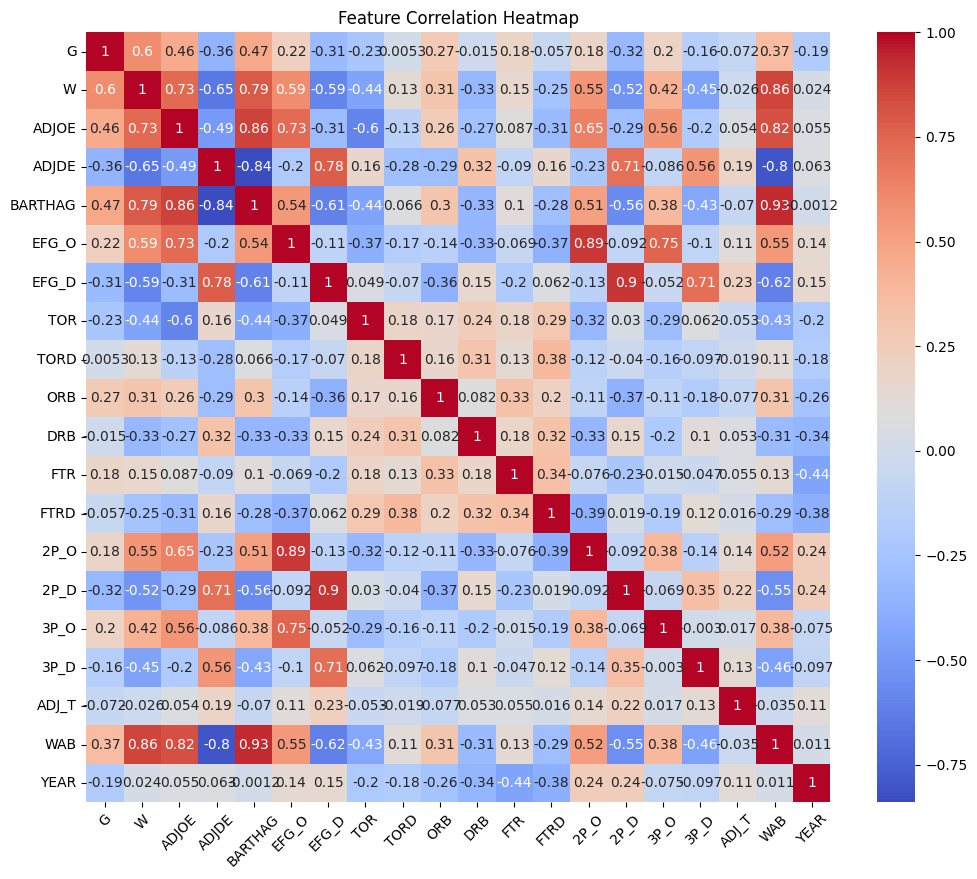

In [ ]:
corr = df.select_dtypes(['int64','float64']).corr()

plt.figure(figsize=(12,10), facecolor='w')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

# 3.0 Preprocessing & Training

## 3.1 Imports

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor # Import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import datetime
import pickle
from sklearn import __version__ as sklearn_version

## 3.2 Train Test Split

In [ ]:
boise_st = df[df.TEAM == 'Boise St.']
boise_st.T

892        902        912        921        1492       2381  \
TEAM     Boise St.  Boise St.  Boise St.  Boise St.  Boise St.  Boise St.   
CONF           MWC        MWC        MWC        MWC        MWC        MWC   
G               30         31         31         32         31         32   
W               18         20         23         13         18         23   
ADJOE        108.2      109.1      109.2      107.6      114.3      109.5   
ADJDE         99.7      101.4       96.3      102.4      103.7       96.0   
BARTHAG      0.719     0.6986     0.8087     0.6404     0.7546      0.821   
EFG_O         51.7       51.8       53.8       53.9       51.2       53.2   
EFG_D         52.0       48.3       48.8       51.8       51.3       47.6   
TOR           16.4       17.9       18.9       17.3       15.0       16.1   
TORD          20.2       16.6       16.4       18.5       17.0       19.4   
ORB           27.2       27.7       29.3       23.5       32.1       27.8   
DRB           25.5       26.5       18.4       24.4       26.4       25.6   
FTR           40.9       40.5       31.0       31.8       36.6       32.4   
FTRD          36.8       41.9       29.5       33.6       42.3       31.6   
2P_O          53.7       51.5       52.0       54.7       49.8       49.6   
2P_D          50.9       47.1       48.4       52.0       50.4       48.1   
3P_O          32.6       34.8       37.5       35.2       35.9       38.9   
3P_D          36.0       34.2       33.0       34.3       35.3       31.3   
ADJ_T         70.3       70.5       70.1       66.9       65.5       63.4   
WAB           -3.6       -3.2       -0.4      -11.9       -3.3        0.2   
YEAR          2016       2017       2018       2019       2014       2015   

              2396       2790       2832       3198       3561  
TEAM     Boise St.  Boise St.  Boise St.  Boise St.  Boise St.  
CONF           MWC        MWC        MWC        MWC        MWC  
G               30         25         34         33         30  
W               19         18         27         24         22  
ADJOE        112.0      107.7      107.6      110.1      114.0  
ADJDE         97.4       96.7       92.9       95.6       97.8  
BARTHAG     0.8332     0.7753     0.8434     0.8361     0.8538  
EFG_O         51.8       52.1       50.7       51.6       51.6  
EFG_D         51.4       48.7       48.3       47.5       49.8  
TOR           18.4       16.5       18.4       16.6       16.5  
TORD          20.0       20.2       20.2       17.5       16.8  
ORB           30.3       27.3       30.6       27.2       32.5  
DRB           24.4       23.8       22.4       24.0       23.1  
FTR           33.7       34.4       35.2       30.3       36.1  
FTRD          42.2       28.0       25.9       27.6       33.1  
2P_O          48.4       52.4       50.6       50.6       51.2  
2P_D          51.0       48.5       48.0       48.0       52.1  
3P_O          38.7       34.4       34.0       35.6       34.8  
3P_D          34.8       32.6       32.6       31.2       30.6  
ADJ_T         66.2       69.3       64.5       66.3       66.6  
WAB           -0.2       -0.7        3.5        2.1        0.9  
YEAR          2013       2021       2022       2023       2024

In [ ]:
df = df[df.TEAM != 'Boise St.']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='W'),
                                                    df.W, test_size=0.3,
                                                    random_state=47)

In [ ]:
X_train.shape, X_test.shape

((2711, 21), (1163, 21))

In [ ]:
y_train.shape, y_test.shape

((2711,), (1163,))

In [ ]:
names_list = ['TEAM', 'CONF', 'YEAR']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((2711, 18), (1163, 18))

## 3.3 Not-Even-A-Model

In [ ]:
train_mean = y_train.mean()
train_mean

np.float64(15.959424566580598)

In [ ]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[15.95942457]])

In [ ]:
y_pred_dumb = dumb_reg.predict(X_train)
y_pred_dumb[:5]

array([15.95942457, 15.95942457, 15.95942457, 15.95942457, 15.95942457])

In [ ]:
y_tr_pred_ = train_mean * np.ones(len(y_train))

In [ ]:
y_te_pred = train_mean * np.ones(len(y_test))

## 3.4 Metrics

### 3.4.1 R-squared

In [ ]:
r2_score(y_train, y_pred_dumb), r2_score(y_test, y_te_pred)

(0.0, -0.0027908728671943717)

### 3.4.2 Mean Absolute Error

In [ ]:
mean_absolute_error(y_train, y_pred_dumb), mean_absolute_error(y_test, y_te_pred)

(5.3112204183102545, 5.317691402784681)

### 3.4.3 Mean Squared Error

In [ ]:
mean_squared_error(y_train, y_pred_dumb), mean_squared_error(y_test, y_te_pred)

(42.19385344976904, 42.75721593317545)

## 3.5 Initial Models

### Regression Models

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#Linear Regression
lr_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

# Lasso Regression
lasso_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SelectKBest(f_regression),
    Lasso()
)

# Ridge Regression
ridge_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SelectKBest(f_regression),
    Ridge()
)

# Fitting models on Training data
lr_pipe.fit(X_train, y_train)
lasso_pipe.fit(X_train, y_train)
ridge_pipe.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr_pipe.predict(X_test)
y_pred_lasso = lasso_pipe.predict(X_test)
y_pred_ridge = ridge_pipe.predict(X_test)

Text(0.5, 0.98, 'True vs Predicted')

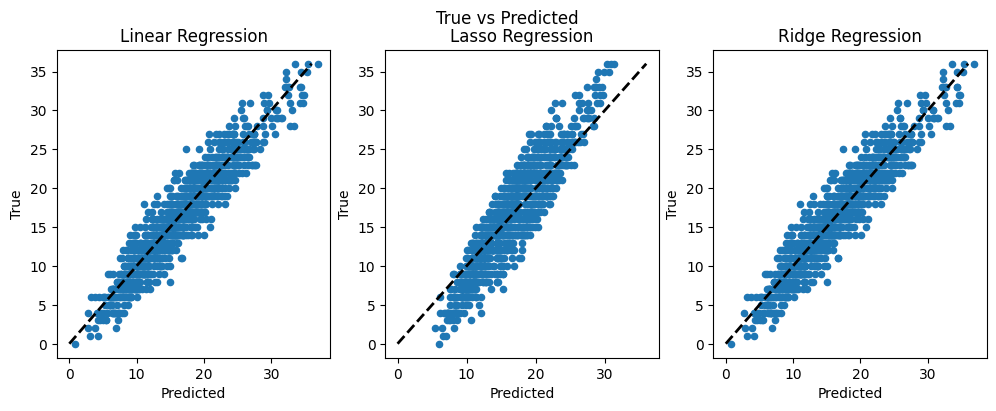

In [ ]:
#Plot the Regression Models

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4), facecolor='w')

#plot linear regression
ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

#plot lasso regression
ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

#plot ridge regression
ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    SelectKBest(f_regression),
    DecisionTreeRegressor()
)

dtr_pipe.fit(X_train, y_train)

y_pred_dtr = dtr_pipe.predict(X_test)

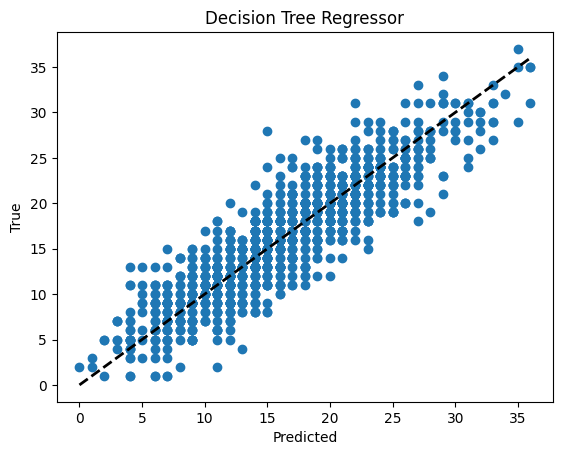

In [ ]:
#plot Decision Tree Regressor
plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    SelectKBest(f_regression),
    RandomForestRegressor()
)

rfr_pipe.fit(X_train, y_train)

y_pred_rfr = rfr_pipe.predict(X_test)

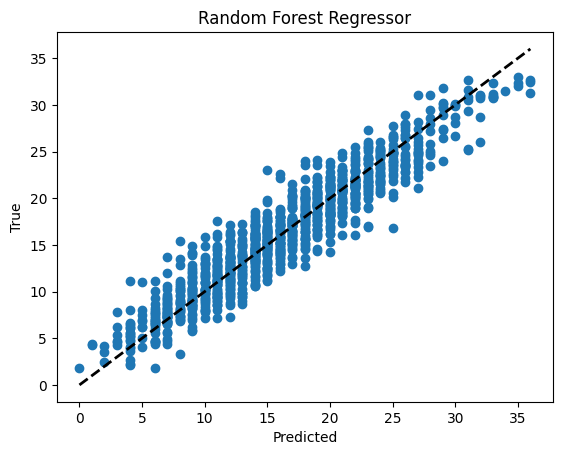

In [ ]:
#plot Random Forest Regressor
plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 2.17 		 4.70 	1.72 		0.89
LassoRegression 	 2.84 		 8.05 	2.31 		0.81
RidgeRegression 	 2.17 		 4.70 	1.72 		0.89


In [ ]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 3.00 		 9.01 		2.29 		0.79


In [ ]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 2.16 		 4.65 		1.70 		0.89


#### Hyperparamter Tuning

In [ ]:
k = [k+1 for k in range(len(X_train.columns))]
n_est = [int(n) for n in np.logspace(start=1, stop=2, num=7)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median'],
        'selectkbest__k': k
}

In [ ]:
n_est

[10, 14, 21, 31, 46, 68, 100]

In [ ]:
rfr_grid_cv = GridSearchCV(rfr_pipe, param_grid=grid_params, cv=4, n_jobs=-1)

In [ ]:
rfr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7e2fee1b1f80>)),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 14, 21, 31,
                                                                 46, 68, 100],
                         'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [ ]:
rfr_grid_cv.best_params_

{'randomforestregressor__n_estimators': 100,
 'selectkbest__k': 17,
 'simpleimputer__strategy': 'median',
 'standardscaler': StandardScaler()}

In [ ]:
score_mean = rfr_grid_cv.cv_results_['mean_test_score']
score_std = rfr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in rfr_grid_cv.cv_results_['param_selectkbest__k']]

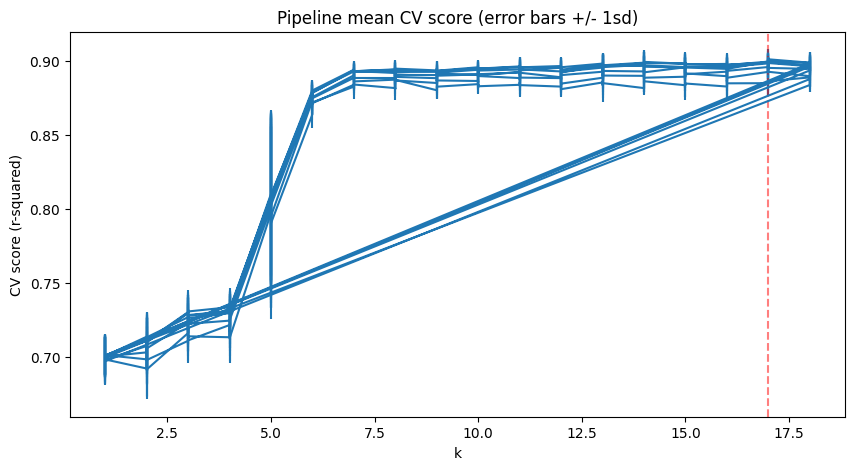

In [ ]:
best_k = rfr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [ ]:
rf_neg_mae = cross_validate(rfr_grid_cv.best_estimator_, X_train, y_train,
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [ ]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(np.float64(1.6110424116395863), np.float64(0.004146657435800791))

In [ ]:
print("""Grid Cross Validation Regressor \t {:.2f}""".format(
            mean_absolute_error(y_test, rfr_grid_cv.best_estimator_.predict(X_test))))

Grid Cross Validation Regressor 	 1.65


#### Feature Importance

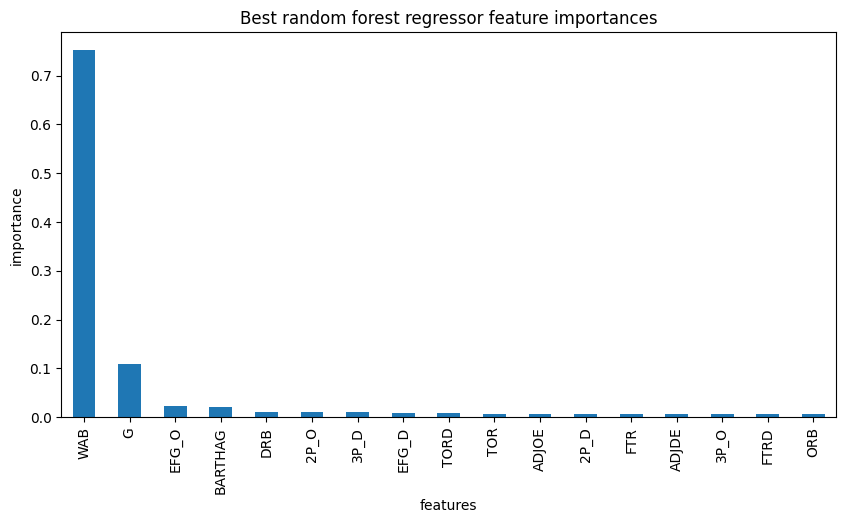

In [ ]:
plt.subplots(figsize=(10, 5))
imps = rfr_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_

# Get the names of the features selected by SelectKBest
selected_features_mask = rfr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
selected_feature_names = X_train.columns[selected_features_mask]

rf_feat_imps = pd.Series(imps, index=selected_feature_names).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [ ]:
rfr_grid_cv.feature_importances_

sorted_idx = rfr_grid_cv.feature_importances_.argsort()
plt.figure(figsize=(8,10), facecolor='w')
plt.barh(X_train.columns[sorted_idx], rfr_grid_cv.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

### Classification Models

## Final Model Selection

In [ ]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(rfr_pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [ ]:
best_model = rfr_grid_cv.best_estimator_
best_model.version = 1.0
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [ ]:
modelpath = '/content/drive/MyDrive/Models'
save_file(best_model, 'cbb_model.pkl', modelpath)

Model saved to /content/drive/MyDrive/Models/cbb_model.pkl


# 4.0 Modeling Checkpoint

In [21]:
df = pd.read_csv('/content/drive/MyDrive/Data/cbb_cleaned.csv')

## Load Model

In [22]:
expected_model_version = '1.0'
model_path = '/content/drive/MyDrive/Models/cbb_model.pkl' # Corrected path
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
else:
    print("Expected model not found")

Expected model version doesn't match version loaded


In [23]:
model.version

1.0

## Refit Model

In [24]:
X = df.loc[df.TEAM != "Boise St.", model.X_columns][10:]
y = df.loc[df.TEAM != "Boise St.", 'W'][10:]

len(X), len(y)

(3864, 3864)

In [25]:
model.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=17,
                             score_func=<function f_regression at 0x7e51dee81d00>)),
                ('randomforestregressor', RandomForestRegressor())])

In [29]:
cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

(np.float64(1.964050328777591), np.float64(0.6743409477412117))

## Calculate Expected Target Variable from Model

In [38]:
X_bm = df.loc[df.TEAM == "Boise St.", model.X_columns][10:]
y_bm = df.loc[df.TEAM == "Boise St.", 'W'][10:]

bm_pred = model.predict(X_bm).item()

y_bm = y_bm.values.item()

print(f'Predicted: {bm_pred:.2f}, Actual: {y_bm:.2f}.')
print(f'Mean Absolute Error: {mae_mean:.2f}')

Predicted: 23.75, Actual: 22.00.
Mean Absolute Error: 1.96


## In Market Context

In [ ]:
def plot_compare(feat_name, description, state=None, figsize=(10, 5)):
    """Graphically compare distributions of features.

    Plot histogram of values for all resorts and reference line to mark
    Big Mountain's position.

    Arguments:
    feat_name - the feature column name in the data
    description - text description of the feature
    state - select a specific state (None for all states)
    figsize - (optional) figure size
    """

    plt.subplots(figsize=figsize)
    # quirk that hist sometimes objects to NaNs, sometimes doesn't
    # filtering only for finite values tidies this up
    if state is None:
        ski_x = ski_data[feat_name]
    else:
        ski_x = ski_data.loc[ski_data.state == state, feat_name]
    ski_x = ski_x[np.isfinite(ski_x)]
    plt.hist(ski_x, bins=30)
    plt.axvline(x=big_mountain[feat_name].values, c='r', ls='--', alpha=0.8, label='Big Mountain')
    plt.xlabel(description)
    plt.ylabel('frequency')
    plt.title(description + ' distribution for resorts in market share')
    plt.legend()

In [ ]:
plot_compare('AdultWeekend', 'Adult weekend ticket price ($)')

In [ ]:
plot_compare('AdultWeekend', 'Adult weekend ticket price ($) - Montana only', state='Montana')

In [ ]:
plot_compare('vertical_drop', 'Vertical drop (feet)')

In [ ]:
plot_compare('Snow Making_ac', 'Area covered by snow makers (acres)')

In [ ]:
plot_compare('total_chairs', 'Total number of chairs')

In [ ]:
plot_compare('fastQuads', 'Number of fast quads')

In [ ]:
plot_compare('Runs', 'Total number of runs')

In [ ]:
plot_compare('LongestRun_mi', 'Longest run length (miles)')

In [ ]:
plot_compare('trams', 'Number of trams')

In [ ]:
plot_compare('SkiableTerrain_ac', 'Skiable terrain area (acres)')

## Modeling Scenarios

In [30]:
X_bm = df.loc[df.TEAM == "Boise St.", model.X_columns][10:]
def predict_increase(features, deltas):
    """Increase in modelled ticket price by applying delta to feature.

    Arguments:
    features - list, names of the features in the ski_data dataframe to change
    deltas - list, the amounts by which to increase the values of the features

    Outputs:
    Amount of increase in the predicted ticket price
    """

    bm2 = X_bm.copy()
    for f, d in zip(features, deltas):
        bm2[f] += d
    return model.predict(bm2).item() - model.predict(X_bm).item()


In [33]:
game_deltas = [i for i in range(1, 11, 1)]
win_deltas = [predict_increase(['G'], [delta]) for delta in game_deltas]
#win_deltas

Text(0.5, 1.0, 'Predicted Wins per Games Played')

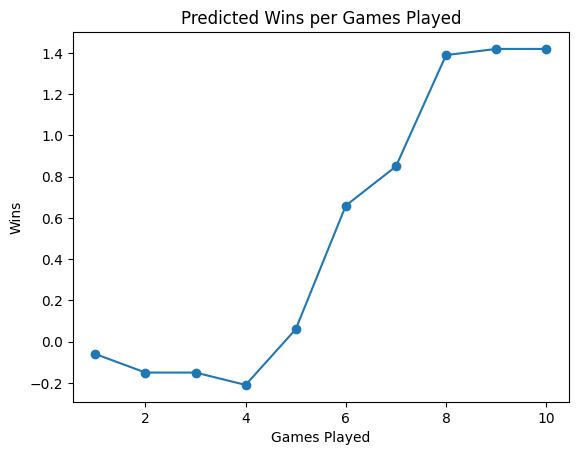

In [34]:
games_played = [1 * games for games in game_deltas] #1

plt.plot(games_played, win_deltas, 'o-')
plt.xlabel('Games Played')
plt.ylabel('Wins')
plt.title('Predicted Wins per Games Played')

In [35]:
defensive_features = ['ADJDE','EFG_D','TOR','DRB','FTRD','2P_D','3P_D']
offensive_features = ['ADJOE','EFG_O','TORD','ORB','FTR','2P_O','3P_O']

defensive_deltas = [i for i in range(-1, -11, -1)]
offensive_deltas = [i for i in range(1, 11, 1)]

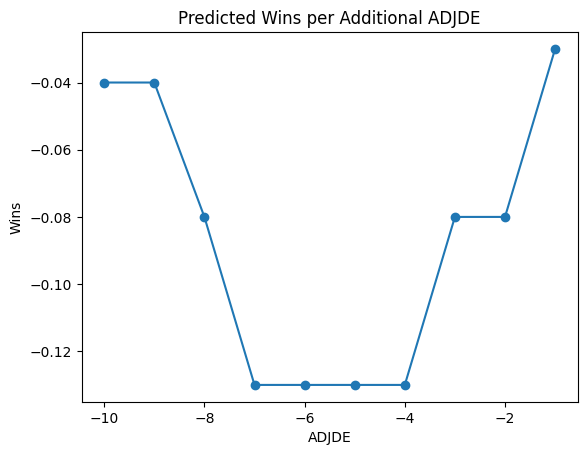

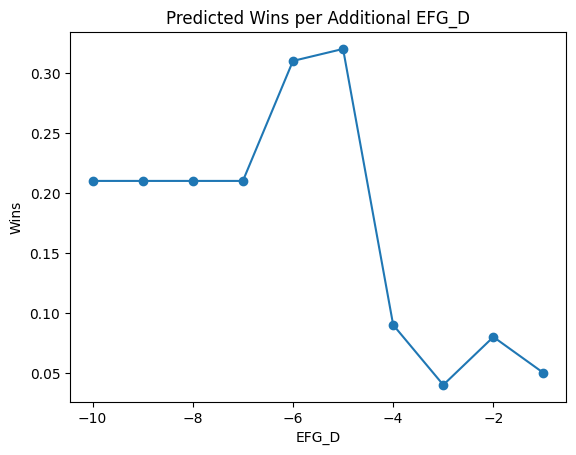

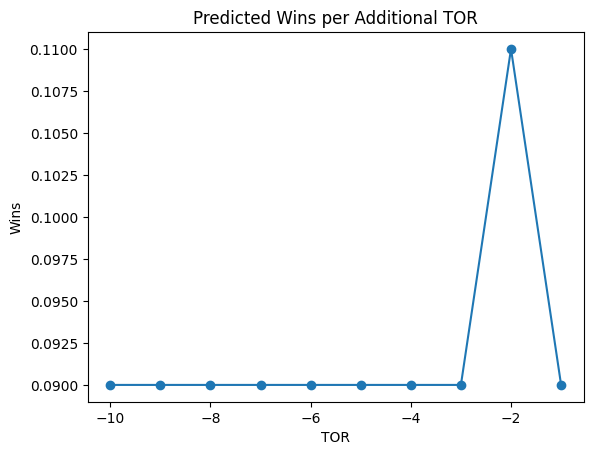

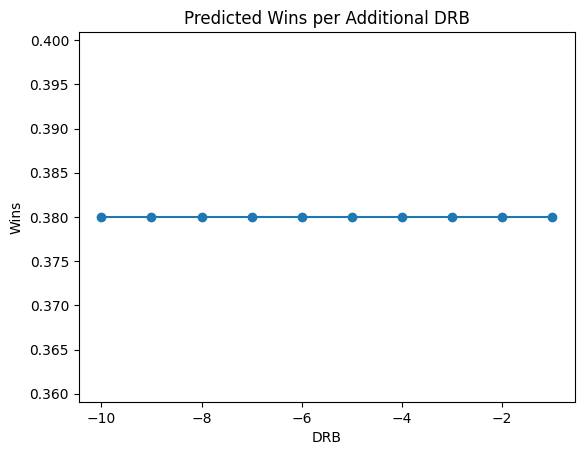

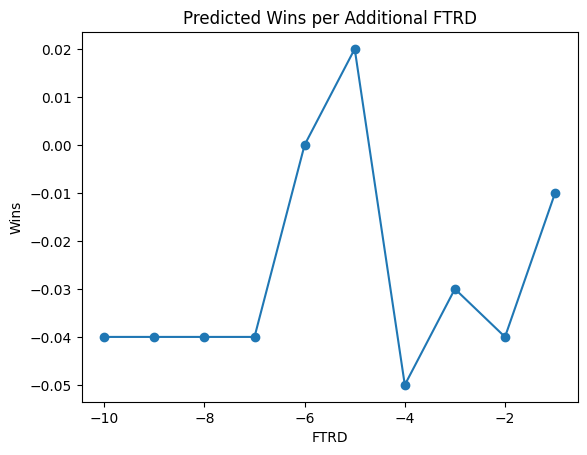

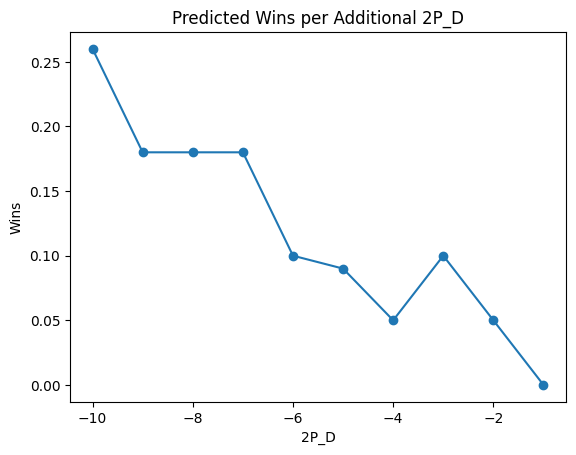

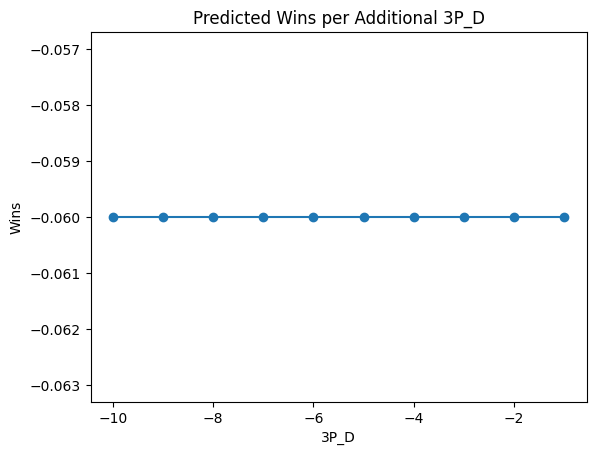

In [37]:
for feature in defensive_features:
    win_deltas = [predict_increase([feature], [delta]) for delta in defensive_deltas]

    deltas = [1 * delta for delta in defensive_deltas]

    plt.figure()
    plt.plot(deltas, win_deltas, 'o-')
    plt.xlabel(feature)
    plt.ylabel('Wins')
    plt.title(f'Predicted Wins per Additional {feature}')
    plt.show()

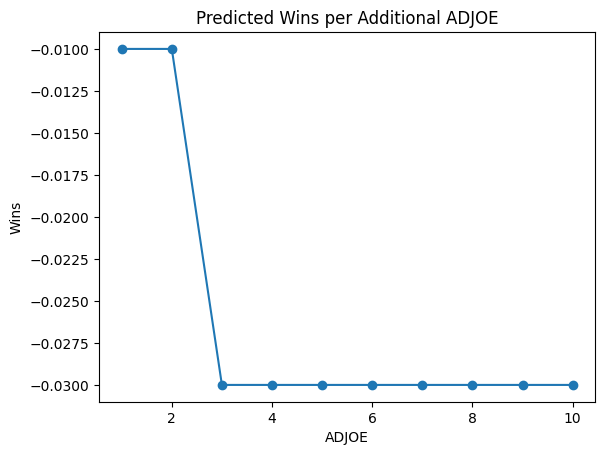

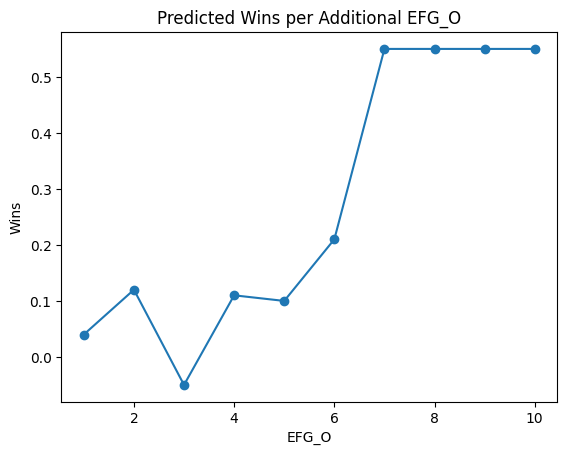

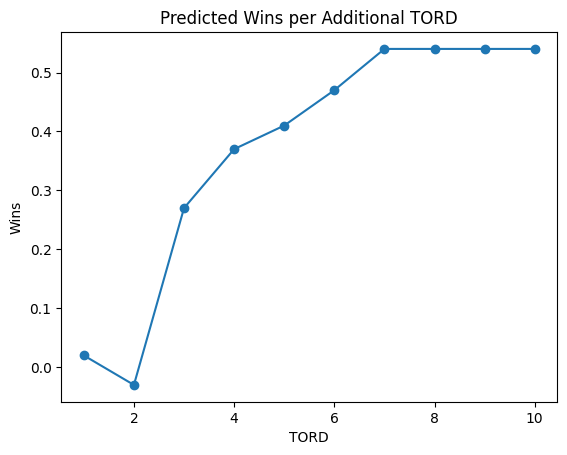

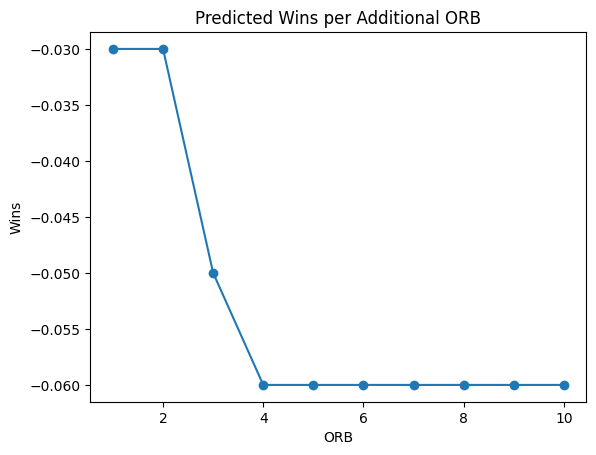

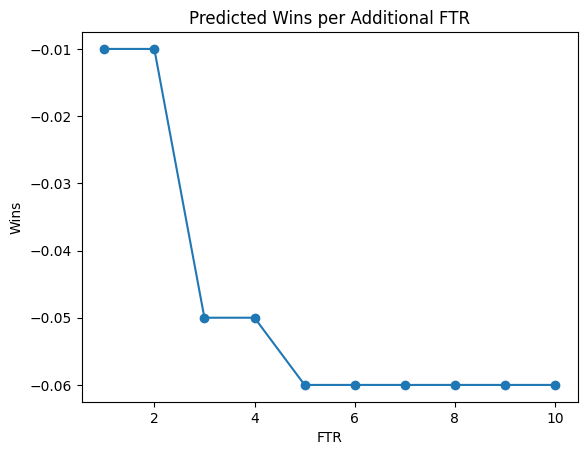

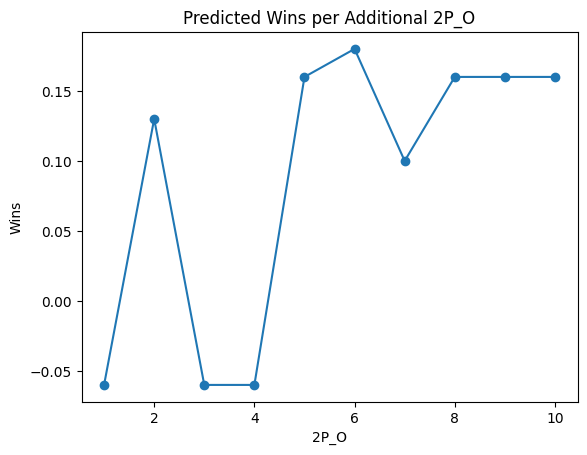

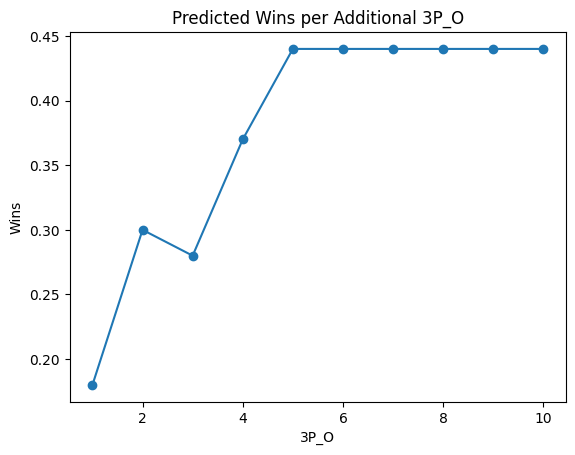

In [39]:
for feature in offensive_features:
    win_deltas = [predict_increase([feature], [delta]) for delta in offensive_deltas]

    deltas = [1 * delta for delta in offensive_deltas]

    plt.figure()
    plt.plot(deltas, win_deltas, 'o-')
    plt.xlabel(feature)
    plt.ylabel('Wins')
    plt.title(f'Predicted Wins per Additional {feature}')
    plt.show()